In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)


In [2]:
credit_data=pd.read_csv("./01_dataset.csv")

In [3]:
credit_data.head(10)

,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,NUMBER_OF_LOANS_BANK,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_CREDIT_CARDS,NUMBER_OF_CREDIT_CARDS_BANK,NUMBER_OF_CREDIT_CARDS_NON_BANK,NUMBER_OF_RELATIONSHIP,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_3M,NUM_NEW_LOAN_TAKEN_BANK_6M,NUM_NEW_LOAN_TAKEN_BANK_9M,NUM_NEW_LOAN_TAKEN_BANK_12M,NUM_NEW_LOAN_TAKEN_NON_BANK_3M,NUM_NEW_LOAN_TAKEN_NON_BANK_6M,NUM_NEW_LOAN_TAKEN_NON_BANK_9M,NUM_NEW_LOAN_TAKEN_NON_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_6M,OUTSTANDING_BAL_ALL_9M,OUTSTANDING_BAL_ALL_12M,OUTSTANDING_BAL_LOAN_3M_6M,OUTSTANDING_BAL_LOAN_6M_9M,OUTSTANDING_BAL_LOAN_9M_12M,OUTSTANDING_BAL_LOAN_6M_12M,OUTSTANDING_BAL_LOAN_3M_12M,OUTSTANDING_BAL_CC_3M_6M,OUTSTANDING_BAL_CC_6M_9M,OUTSTANDING_BAL_CC_9M_12M,OUTSTANDING_BAL_CC_6M_12M,OUTSTANDING_BAL_CC_3M_12M,OUTSTANDING_BAL_ALL_3M_6M,OUTSTANDING_BAL_ALL_6M_9M,OUTSTANDING_BAL_ALL_9M_12M,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M,INCREASING_BAL_3M_LOAN,INCREASING_BAL_6M_LOAN,INCREASING_BAL_3M_CC,INCREASING_BAL_6M_CC,INCREASING_BAL_3M_ALL,INCREASING_BAL_6M_ALL,OUTSTANDING_BAL_CC_CURRENT,CREDIT_CARD_MONTH_SINCE_10DPD,CREDIT_CARD_MONTH_SINCE_30DPD,CREDIT_CARD_MONTH_SINCE_60DPD,CREDIT_CARD_MONTH_SINCE_90DPD,CREDIT_CARD_NUMBER_OF_LATE_PAYMENT,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_BANK_FOR_CC_3M,ENQUIRIES_FROM_NON_BANK_FOR_CC_3M,ENQUIRIES_FROM_BANK_6M,ENQUIRIES_FROM_NON_BANK_6M,ENQUIRIES_FOR_LOAN_6M,ENQUIRIES_FOR_CC_6M,ENQUIRIES_FROM_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_BANK_FOR_CC_6M,ENQUIRIES_FROM_NON_BANK_FOR_CC_6M,ENQUIRIES_FROM_BANK_9M,ENQUIRIES_FROM_NON_BANK_9M,ENQUIRIES_FOR_LOAN_9M,ENQUIRIES_FOR_CC_9M,ENQUIRIES_FROM_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_BANK_FOR_CC_9M,ENQUIRIES_FROM_NON_BANK_FOR_CC_9M,ENQUIRIES_FROM_BANK_12M,ENQUIRIES_FROM_NON_BANK_12M,ENQUIRIES_FOR_LOAN_12M,ENQUIRIES_FOR_CC_12M,ENQUIRIES_FROM_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_BANK_FOR_CC_12M,ENQUIRIES_FROM_NON_BANK_FOR_CC_12M,ENQUIRIES_3M_6M,ENQUIRIES_6M_9M,ENQUIRIES_9M_12M,ENQUIRIES_6M_12M,ENQUIRIES_3M_12M,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
0,1639,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,1.00,"1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,205.00","1,000,000.00","1,000,000.00","1,000,000.00",NaN,"1,000,000.00","1,000,000.00","1,000,000.00","1,000,205.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00",NaN,"1,000,000.00",431.00,431.00,431.00,431.00,1.00,7.00,7.00,17.00,17.00,2.00,7.00,7.00,2.00,2.00,7.00,2.00,2.00,2.00,7.00,7.00,2.00,2.00,7.00,2.00,NaN,2.00,17.00,12.00,7.00,2.00,12.00,2.00,7.00,2.00,17.00,12.00,7.00,2.00,12.00

In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 124 entries, customer_id to OUTSTANDING_BAL_ALL_CURRENT
dtypes: float64(122), int64(2)
memory usage: 18.9 MB


In [5]:
credit_data.shape

(20000, 124)

In [6]:
credit_data.columns.tolist()

['customer_id',
 'label',
 'SHORT_TERM_COUNT',
 'MID_TERM_COUNT',
 'LONG_TERM_COUNT',
 'SHORT_TERM_COUNT_BANK',
 'MID_TERM_COUNT_BANK',
 'LONG_TERM_COUNT_BANK',
 'SHORT_TERM_COUNT_NON_BANK',
 'MID_TERM_COUNT_NON_BANK',
 'LONG_TERM_COUNT_NON_BANK',
 'NUMBER_OF_LOANS',
 'NUMBER_OF_LOANS_BANK',
 'NUMBER_OF_LOANS_NON_BANK',
 'NUMBER_OF_CREDIT_CARDS',
 'NUMBER_OF_CREDIT_CARDS_BANK',
 'NUMBER_OF_CREDIT_CARDS_NON_BANK',
 'NUMBER_OF_RELATIONSHIP',
 'NUMBER_OF_RELATIONSHIP_BANK',
 'NUMBER_OF_RELATIONSHIP_NON_BANK',
 'NUM_NEW_LOAN_TAKEN_3M',
 'NUM_NEW_LOAN_TAKEN_6M',
 'NUM_NEW_LOAN_TAKEN_9M',
 'NUM_NEW_LOAN_TAKEN_12M',
 'NUM_NEW_LOAN_TAKEN_BANK_3M',
 'NUM_NEW_LOAN_TAKEN_BANK_6M',
 'NUM_NEW_LOAN_TAKEN_BANK_9M',
 'NUM_NEW_LOAN_TAKEN_BANK_12M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_3M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_6M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_9M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_12M',
 'OUTSTANDING_BAL_LOAN_CURRENT',
 'OUTSTANDING_BAL_LOAN_3M',
 'OUTSTANDING_BAL_LOAN_6M',
 'OUTSTANDING_BAL_LOAN_9M',


In [7]:
credit_data.describe()

,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,NUMBER_OF_LOANS_BANK,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_CREDIT_CARDS,NUMBER_OF_CREDIT_CARDS_BANK,NUMBER_OF_CREDIT_CARDS_NON_BANK,NUMBER_OF_RELATIONSHIP,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_3M,NUM_NEW_LOAN_TAKEN_BANK_6M,NUM_NEW_LOAN_TAKEN_BANK_9M,NUM_NEW_LOAN_TAKEN_BANK_12M,NUM_NEW_LOAN_TAKEN_NON_BANK_3M,NUM_NEW_LOAN_TAKEN_NON_BANK_6M,NUM_NEW_LOAN_TAKEN_NON_BANK_9M,NUM_NEW_LOAN_TAKEN_NON_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_6M,OUTSTANDING_BAL_ALL_9M,OUTSTANDING_BAL_ALL_12M,OUTSTANDING_BAL_LOAN_3M_6M,OUTSTANDING_BAL_LOAN_6M_9M,OUTSTANDING_BAL_LOAN_9M_12M,OUTSTANDING_BAL_LOAN_6M_12M,OUTSTANDING_BAL_LOAN_3M_12M,OUTSTANDING_BAL_CC_3M_6M,OUTSTANDING_BAL_CC_6M_9M,OUTSTANDING_BAL_CC_9M_12M,OUTSTANDING_BAL_CC_6M_12M,OUTSTANDING_BAL_CC_3M_12M,OUTSTANDING_BAL_ALL_3M_6M,OUTSTANDING_BAL_ALL_6M_9M,OUTSTANDING_BAL_ALL_9M_12M,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M,INCREASING_BAL_3M_LOAN,INCREASING_BAL_6M_LOAN,INCREASING_BAL_3M_CC,INCREASING_BAL_6M_CC,INCREASING_BAL_3M_ALL,INCREASING_BAL_6M_ALL,OUTSTANDING_BAL_CC_CURRENT,CREDIT_CARD_MONTH_SINCE_10DPD,CREDIT_CARD_MONTH_SINCE_30DPD,CREDIT_CARD_MONTH_SINCE_60DPD,CREDIT_CARD_MONTH_SINCE_90DPD,CREDIT_CARD_NUMBER_OF_LATE_PAYMENT,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_BANK_FOR_CC_3M,ENQUIRIES_FROM_NON_BANK_FOR_CC_3M,ENQUIRIES_FROM_BANK_6M,ENQUIRIES_FROM_NON_BANK_6M,ENQUIRIES_FOR_LOAN_6M,ENQUIRIES_FOR_CC_6M,ENQUIRIES_FROM_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_BANK_FOR_CC_6M,ENQUIRIES_FROM_NON_BANK_FOR_CC_6M,ENQUIRIES_FROM_BANK_9M,ENQUIRIES_FROM_NON_BANK_9M,ENQUIRIES_FOR_LOAN_9M,ENQUIRIES_FOR_CC_9M,ENQUIRIES_FROM_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_BANK_FOR_CC_9M,ENQUIRIES_FROM_NON_BANK_FOR_CC_9M,ENQUIRIES_FROM_BANK_12M,ENQUIRIES_FROM_NON_BANK_12M,ENQUIRIES_FOR_LOAN_12M,ENQUIRIES_FOR_CC_12M,ENQUIRIES_FROM_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_BANK_FOR_CC_12M,ENQUIRIES_FROM_NON_BANK_FOR_CC_12M,ENQUIRIES_3M_6M,ENQUIRIES_6M_9M,ENQUIRIES_9M_12M,ENQUIRIES_6M_12M,ENQUIRIES_3M_12M,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
count,"20,000.00","20,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00","18,000.00"

In [8]:
credit_data.isnull().sum()

customer_id                          0
label                                0
SHORT_TERM_COUNT                  2000
MID_TERM_COUNT                    2000
LONG_TERM_COUNT                   2000
                                  ... 
ENQUIRIES_FROM_NON_BANK_6M_9M     2000
ENQUIRIES_FROM_NON_BANK_9M_12M    2000
ENQUIRIES_FROM_NON_BANK_6M_12M    2000
ENQUIRIES_FROM_NON_BANK_3M_12M    2000
OUTSTANDING_BAL_ALL_CURRENT       2000
Length: 124, dtype: int64

Ngoại trừ cột `customer_id`, `label`; các cột còn lại mỗi cột đều có 2000 giá trị null cần được xử lý

In [9]:
label_0=credit_data[credit_data["label"]==0]
label_1=credit_data[credit_data["label"]==1]
n=len(label_0)/len(credit_data["label"])
n_1=len(label_1)/len(credit_data["label"])
print(f"Số khách hàng trả nợ đúng hạn {len(label_0)}")
print(f"Số khách hàng quá hạn trả nợ {len(label_1)}")
print(f"Tỷ lệ số khách hàng trả nợ đúng hạn trên tổng số khách hàng: {n}")
print(f"Tỷ lệ số khách hàng quá hạn trả nợ trên tổng số khách hàng: {n_1}")

Số khách hàng trả nợ đúng hạn 16356
Số khách hàng quá hạn trả nợ 3644
Tỷ lệ số khách hàng trả nợ đúng hạn trên tổng số khách hàng: 0.8178
Tỷ lệ số khách hàng quá hạn trả nợ trên tổng số khách hàng: 0.1822


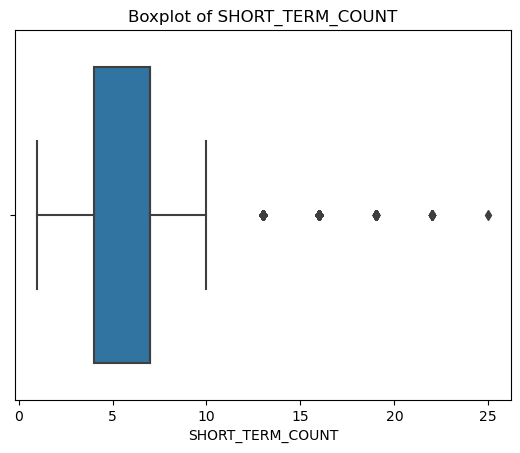

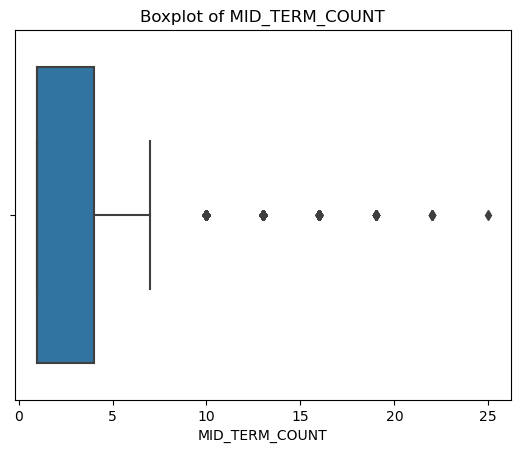

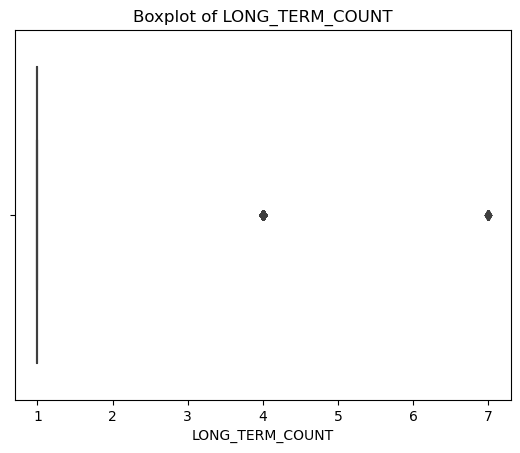

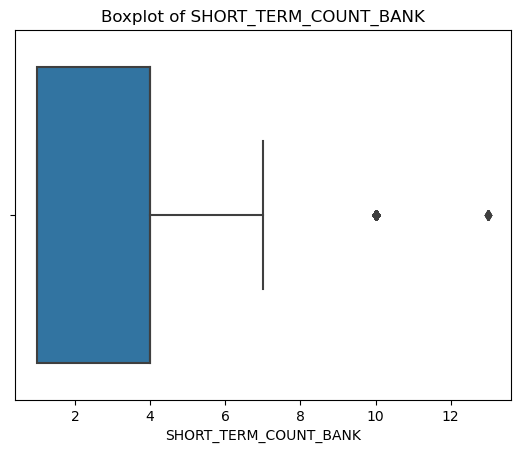

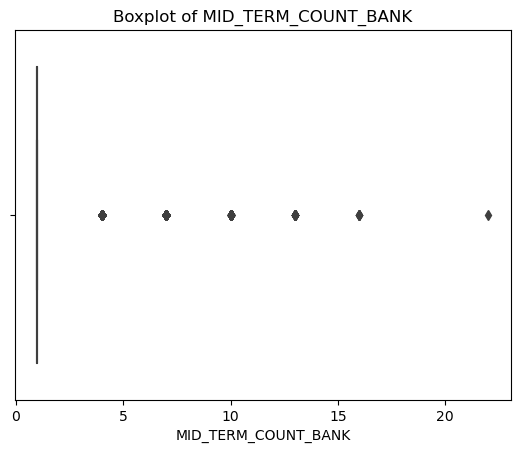

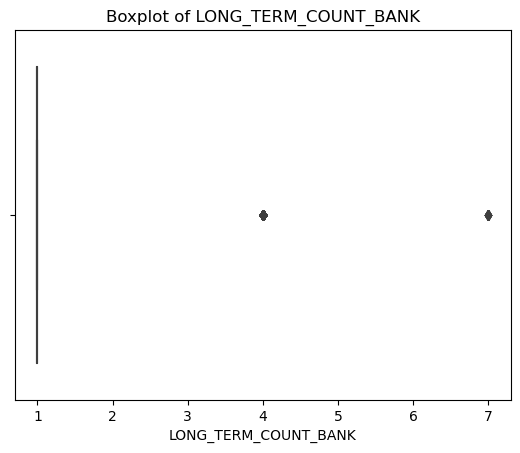

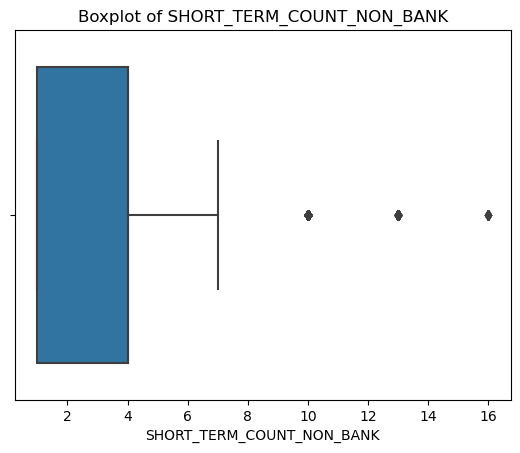

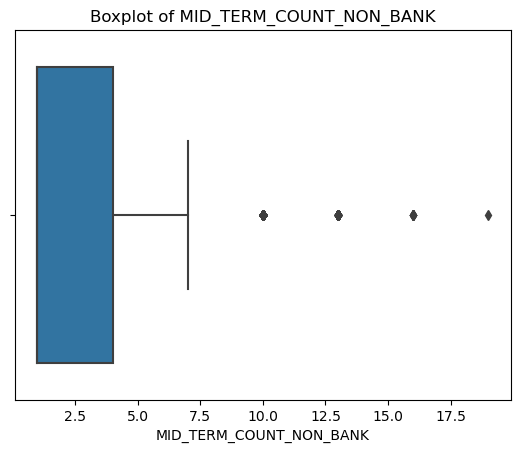

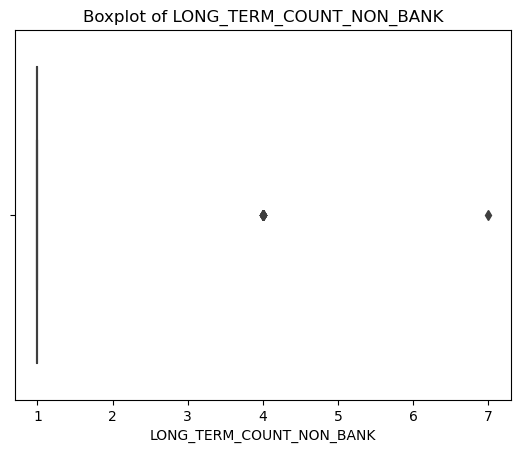

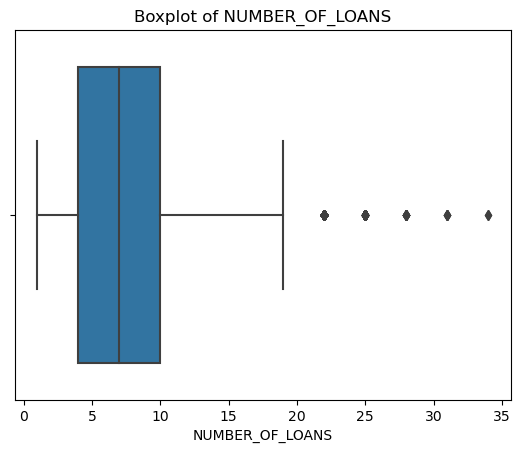

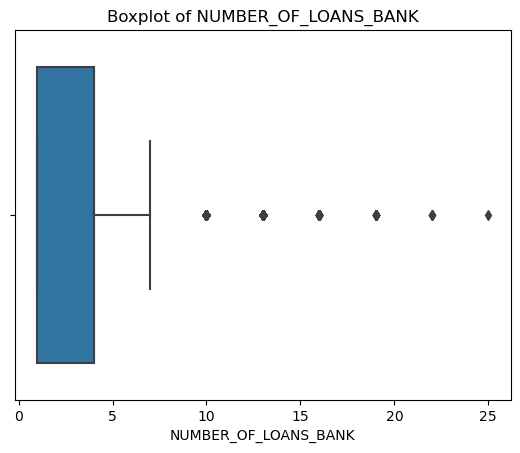

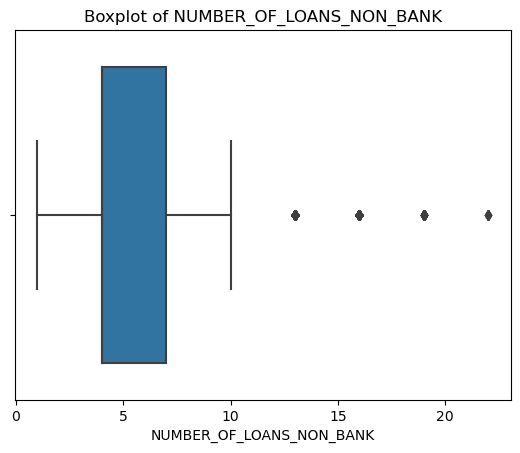

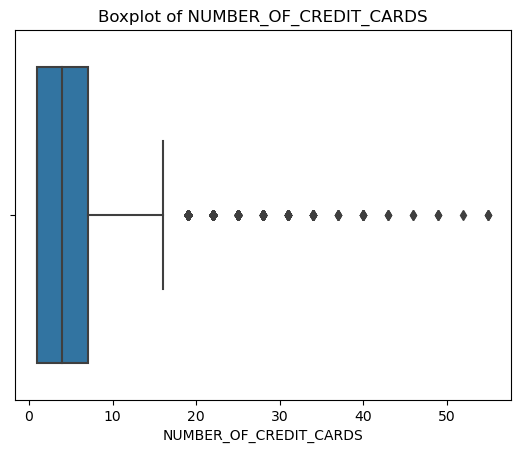

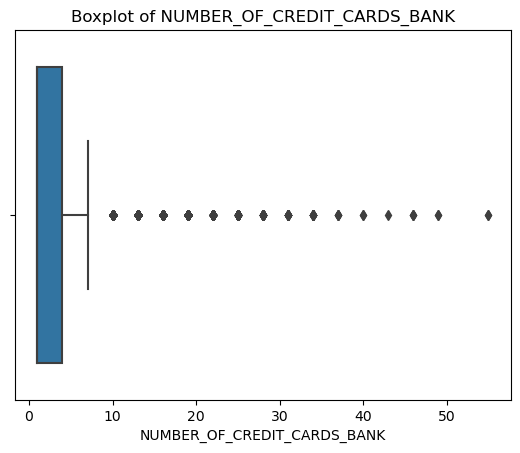

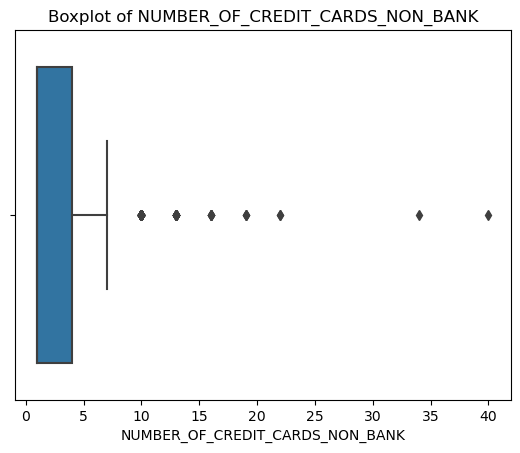

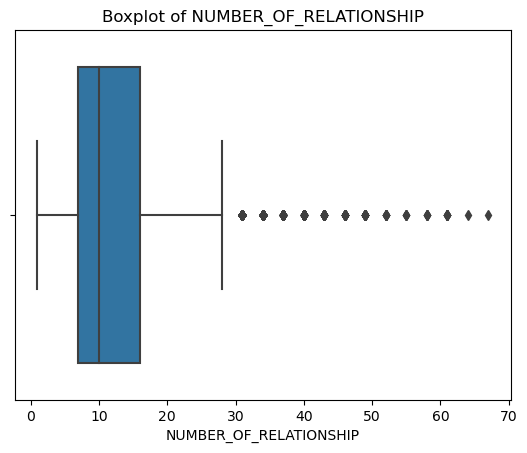

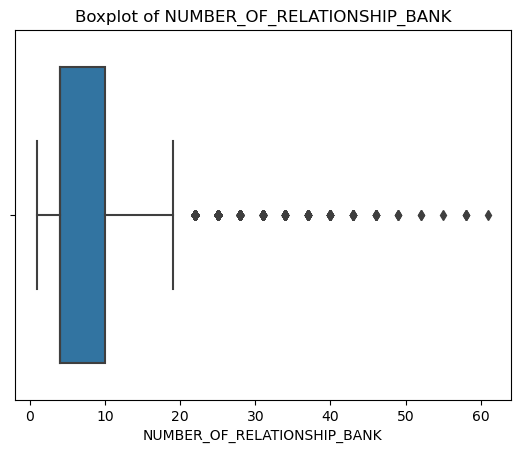

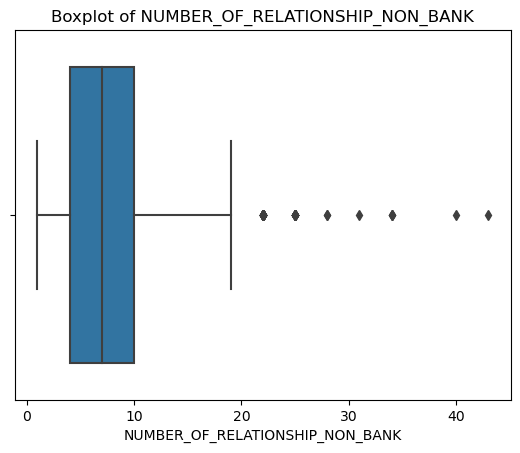

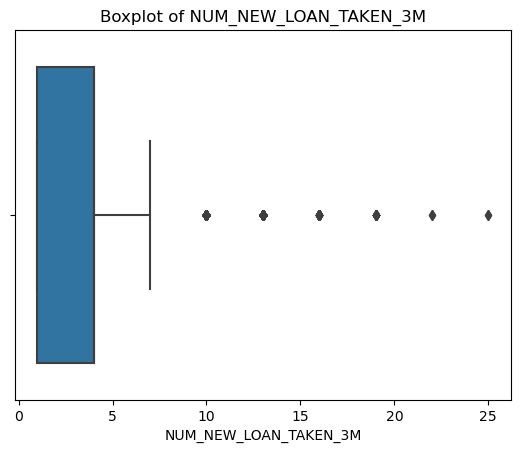

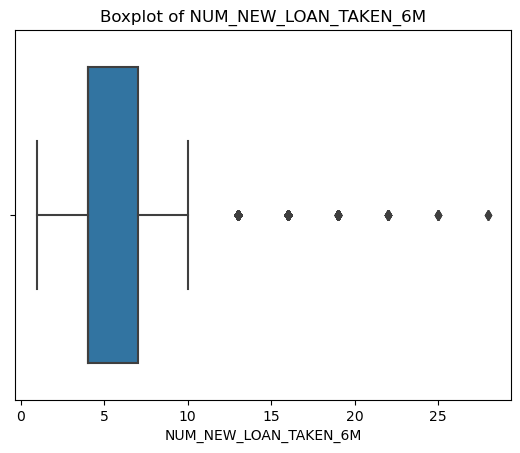

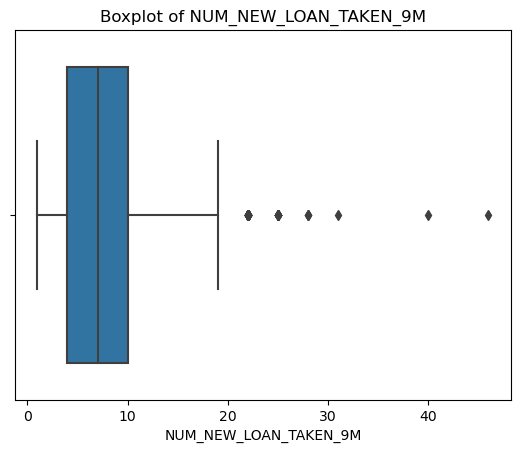

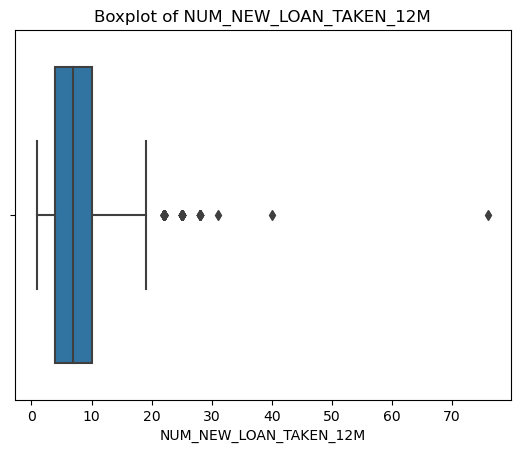

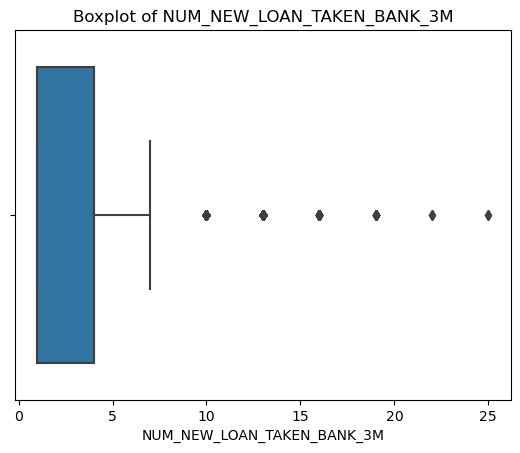

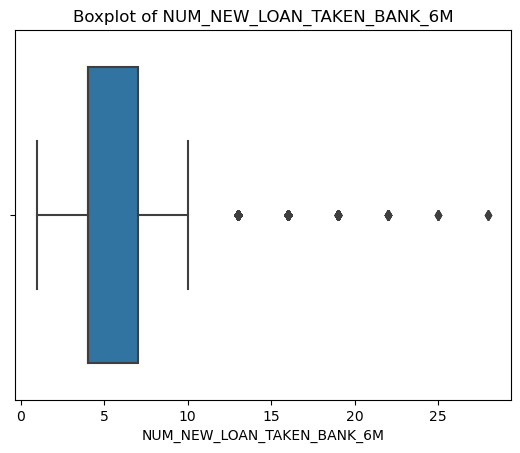

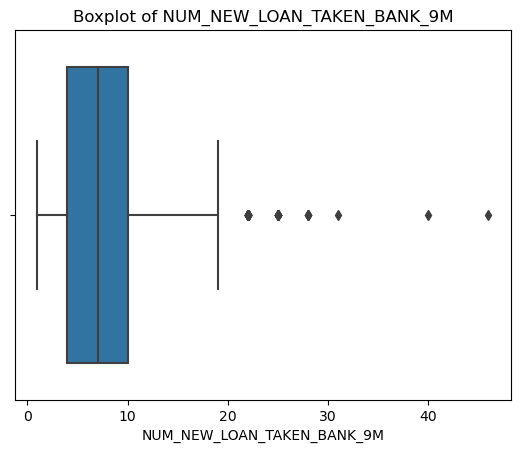

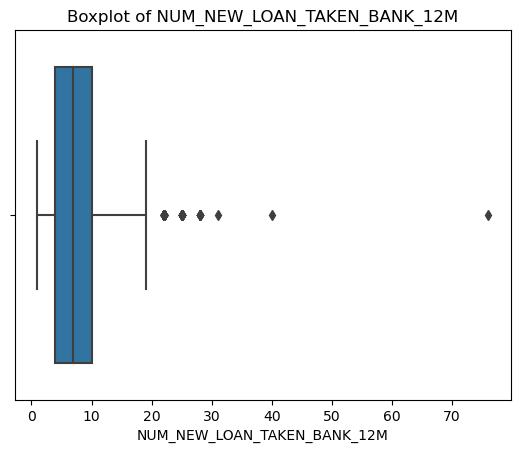

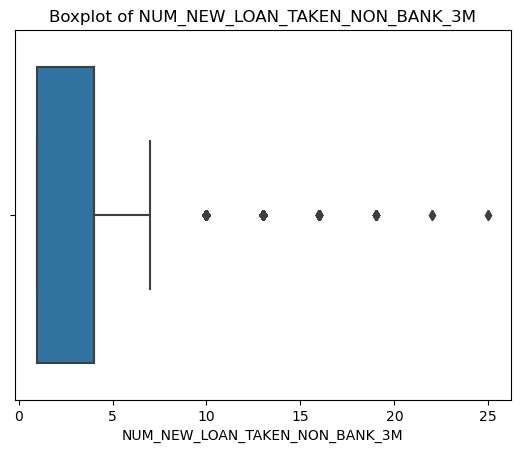

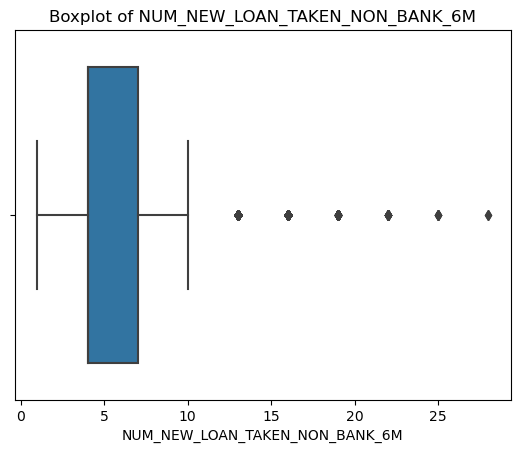

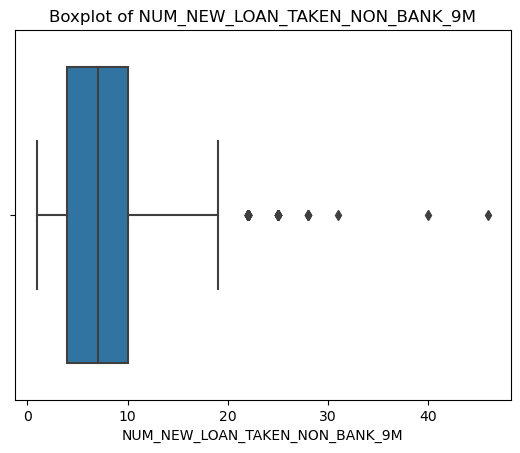

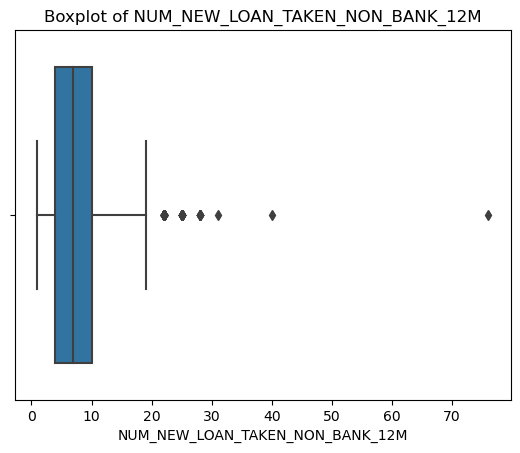

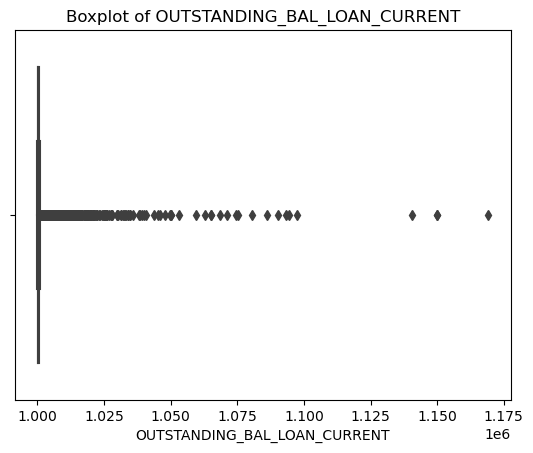

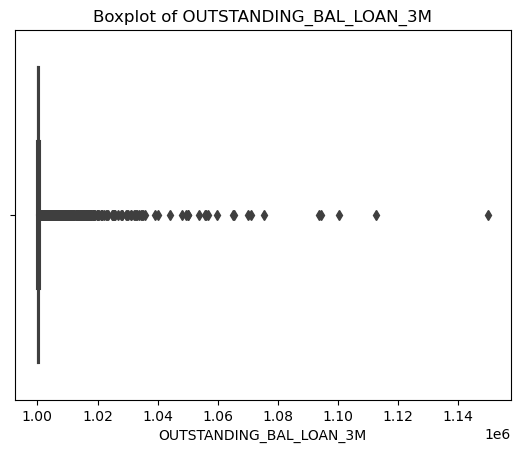

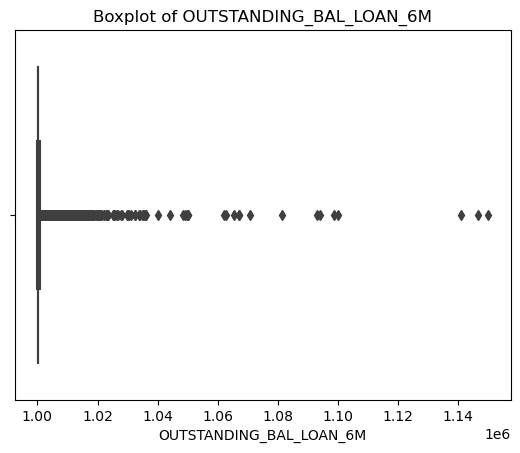

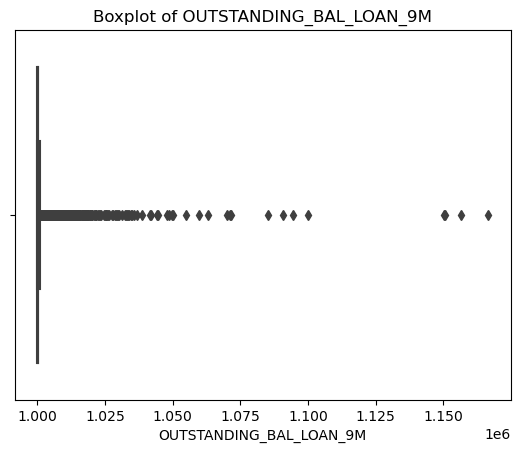

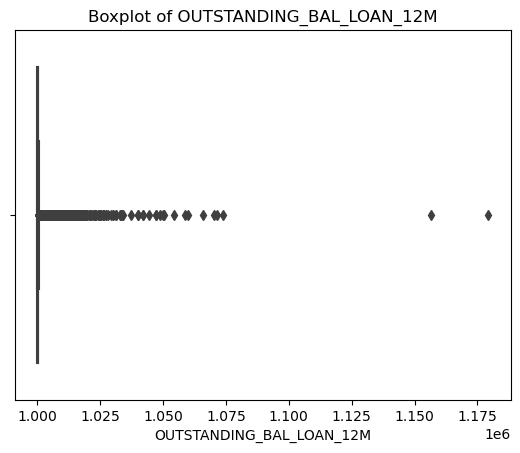

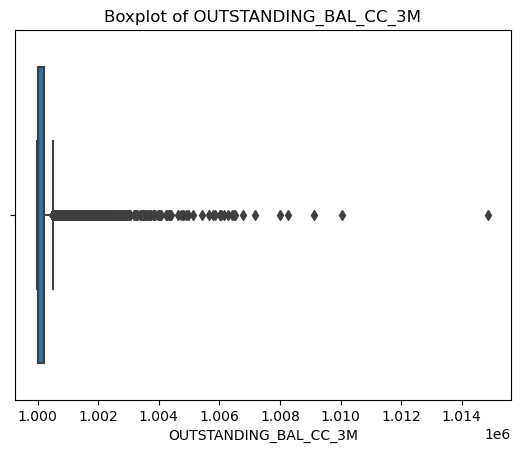

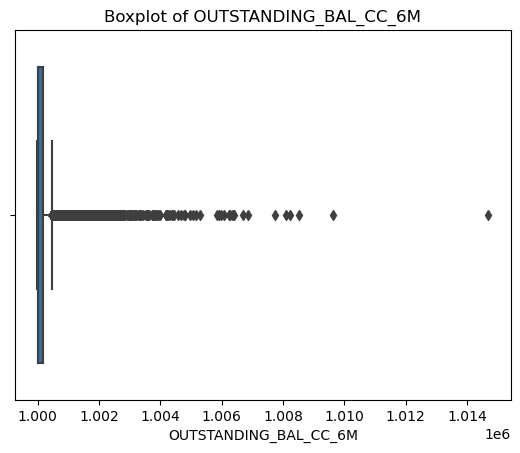

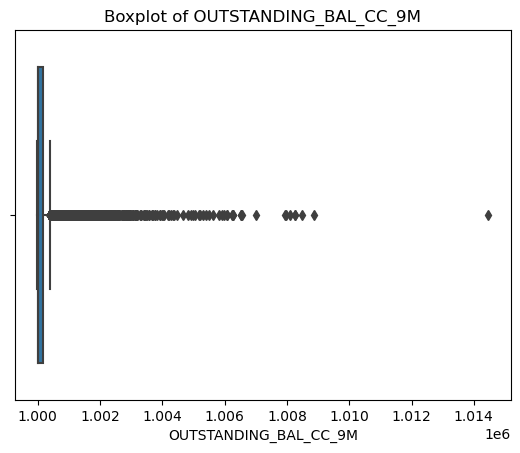

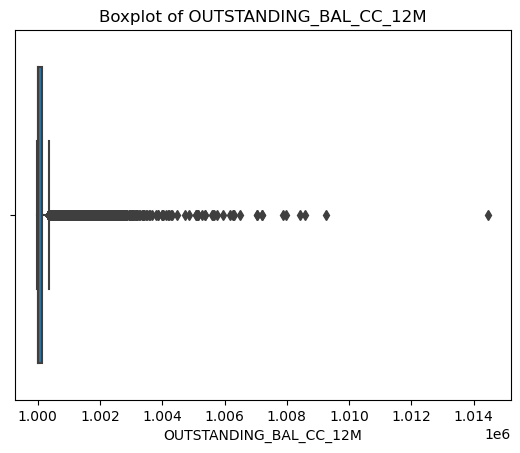

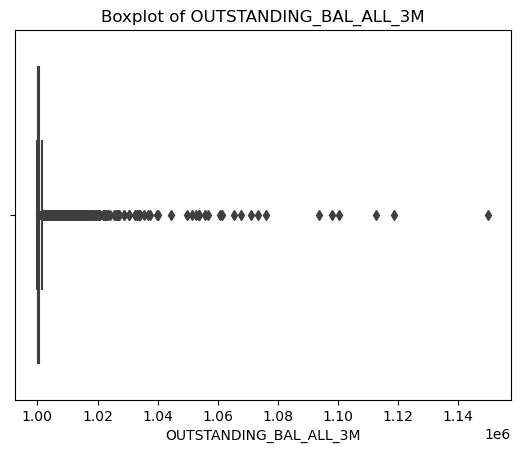

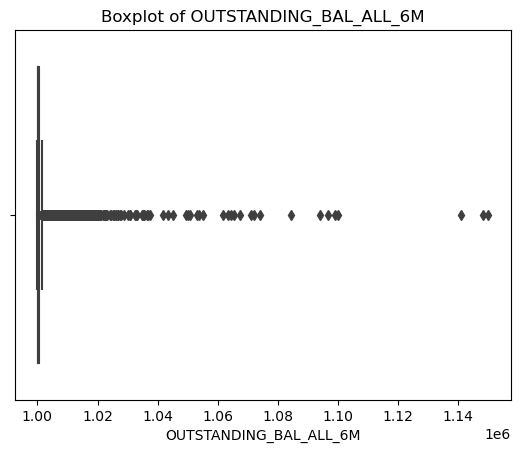

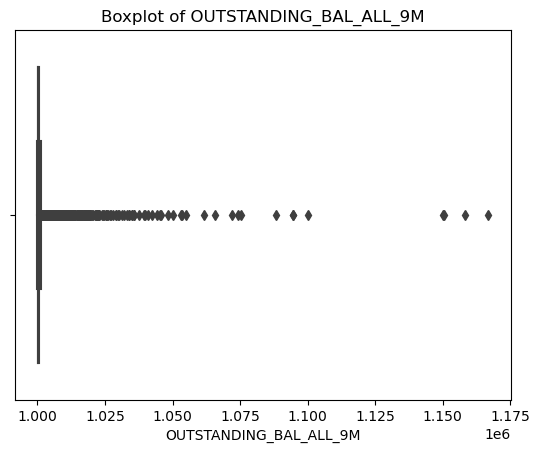

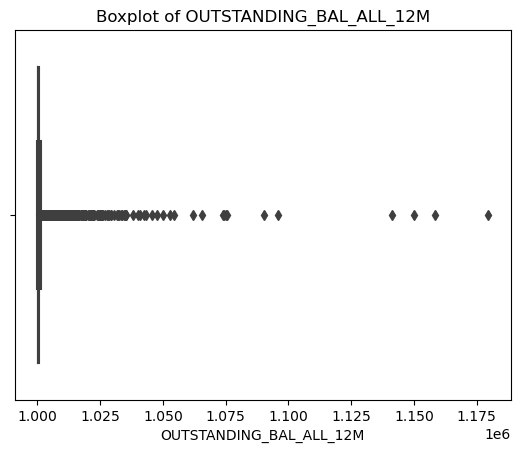

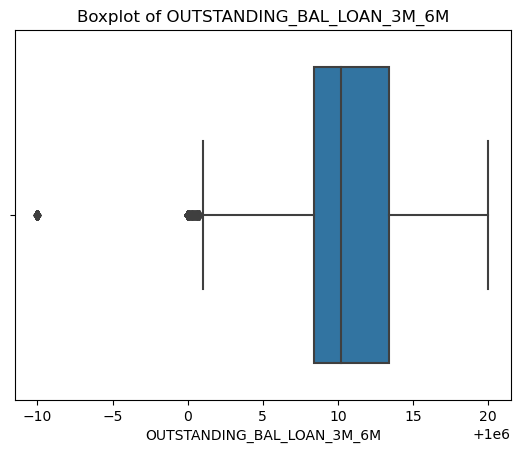

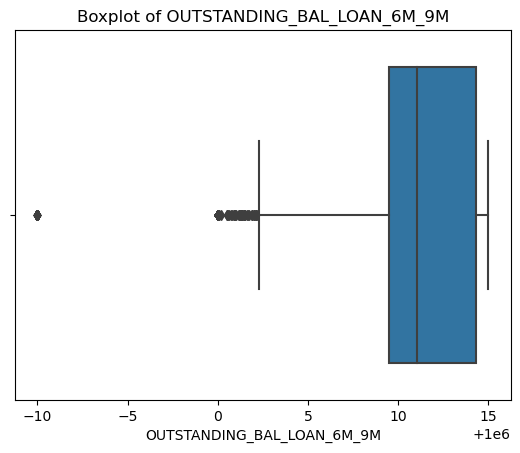

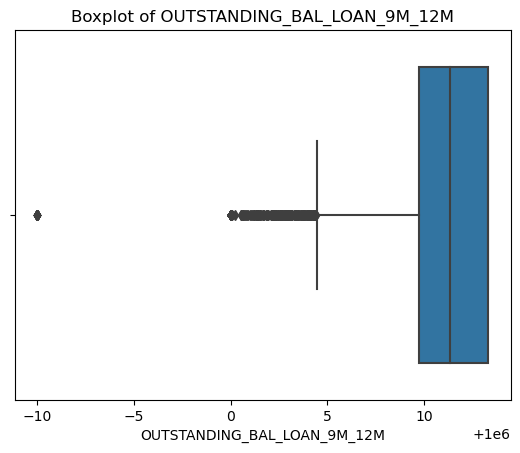

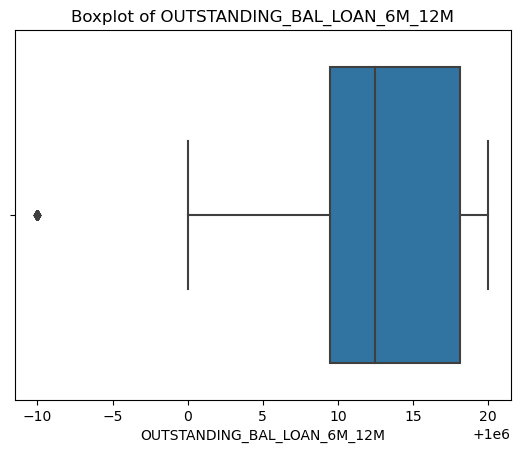

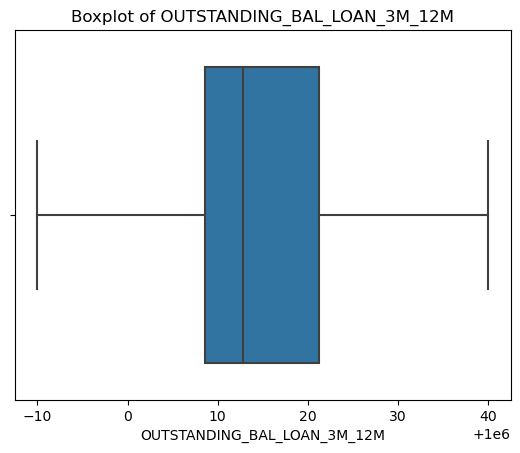

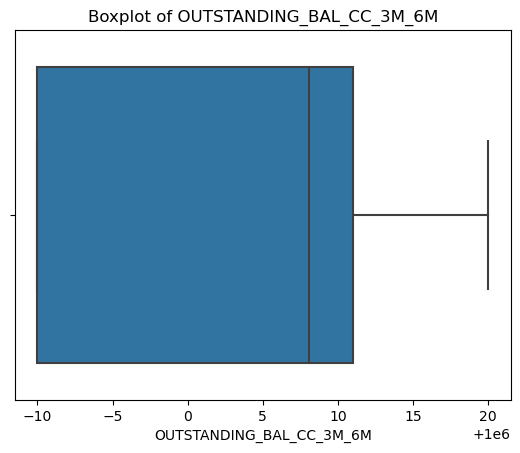

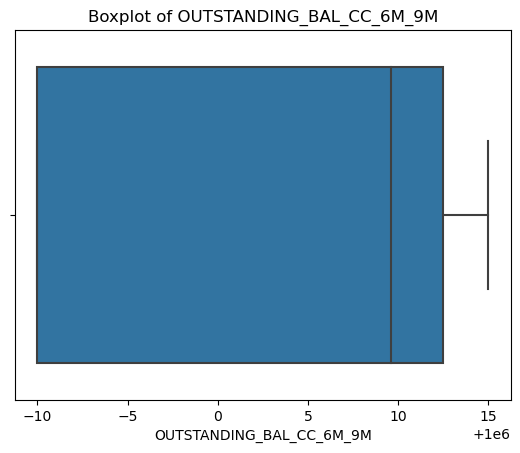

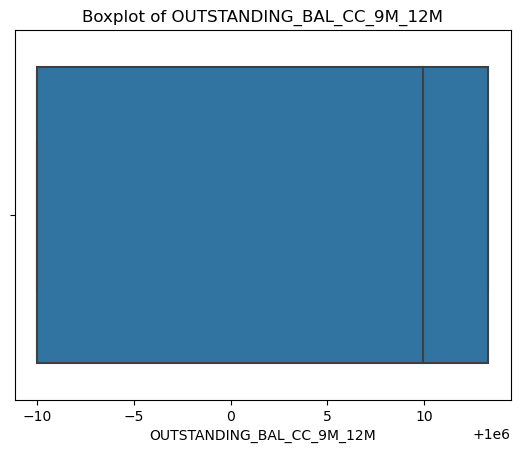

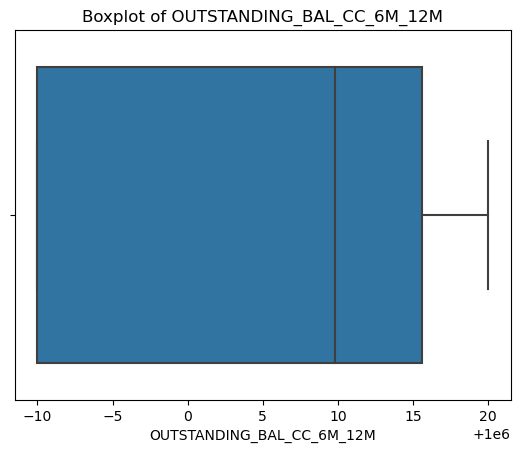

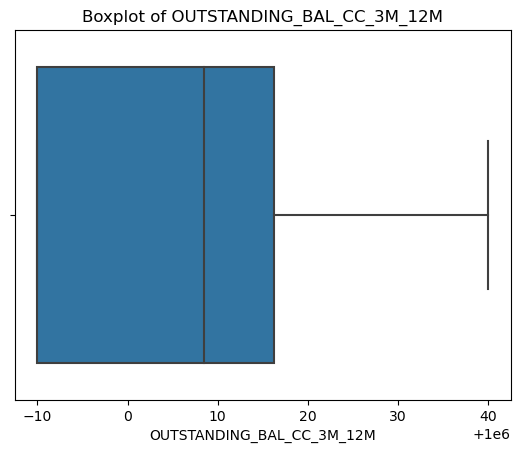

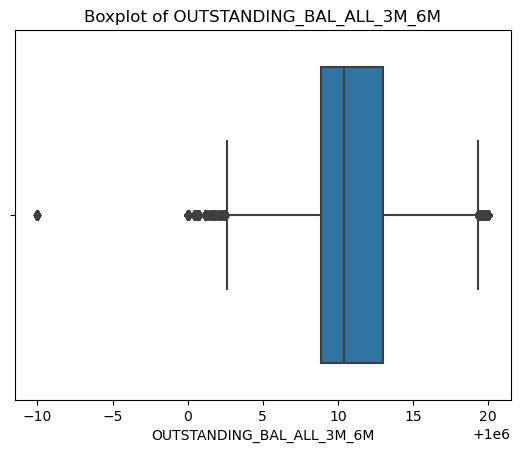

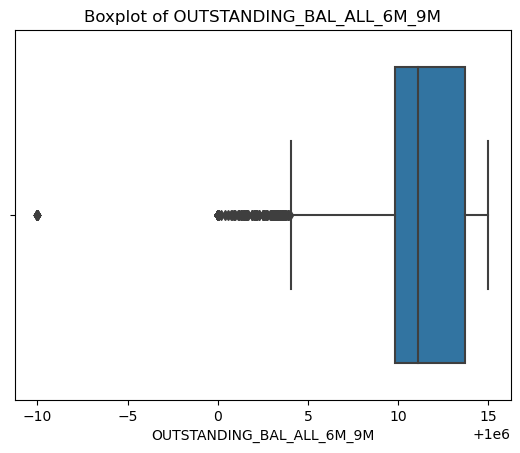

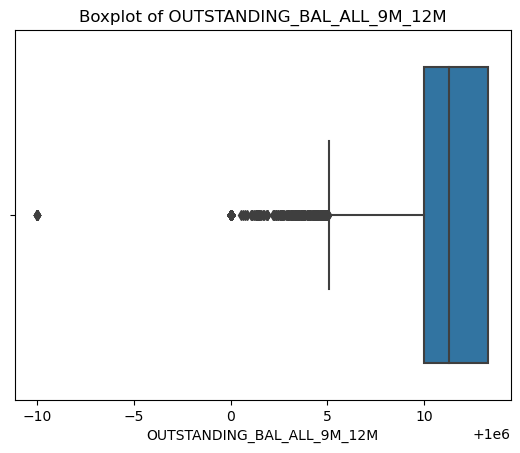

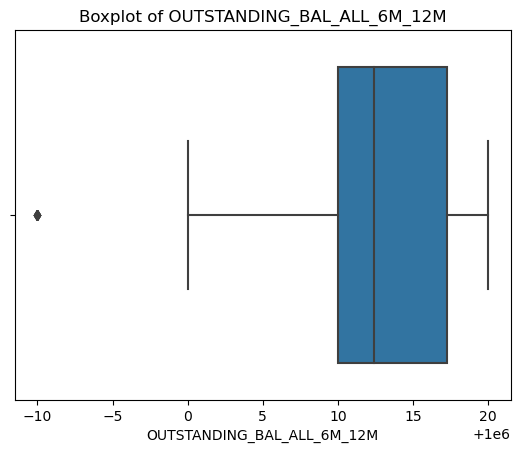

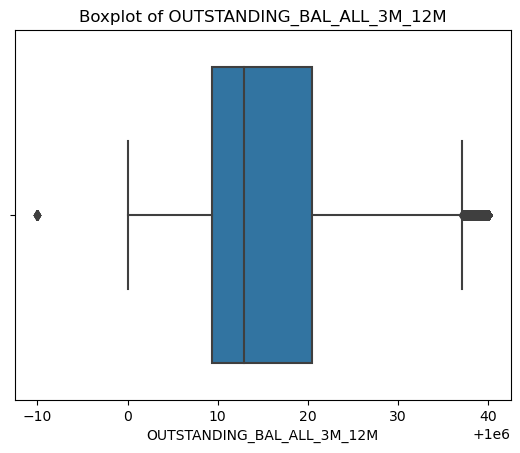

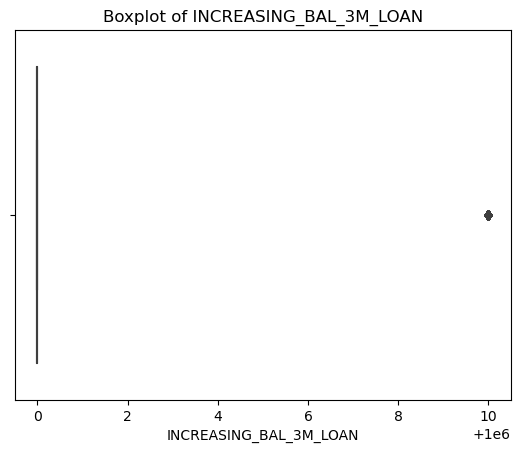

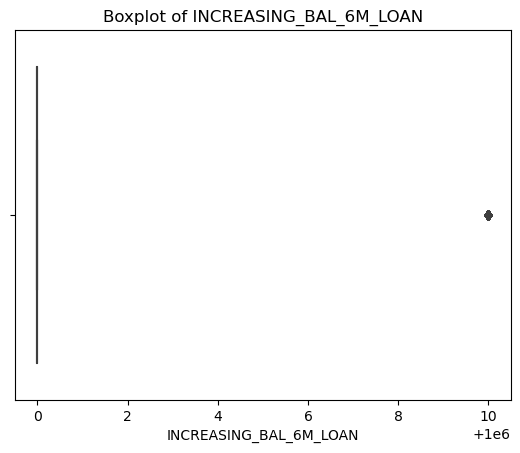

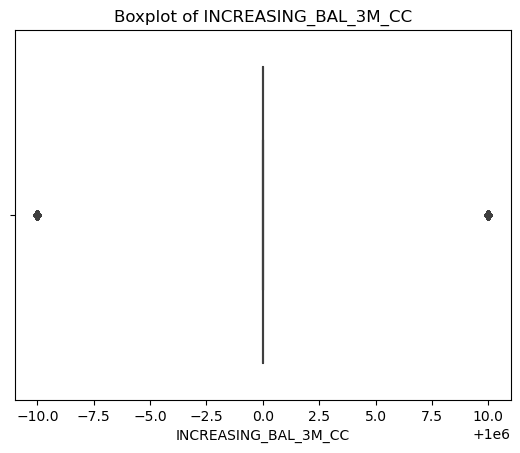

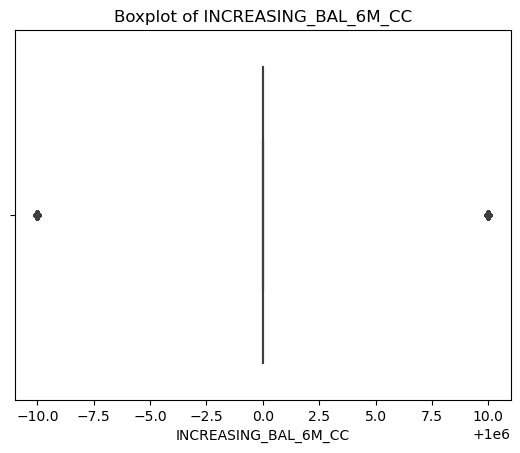

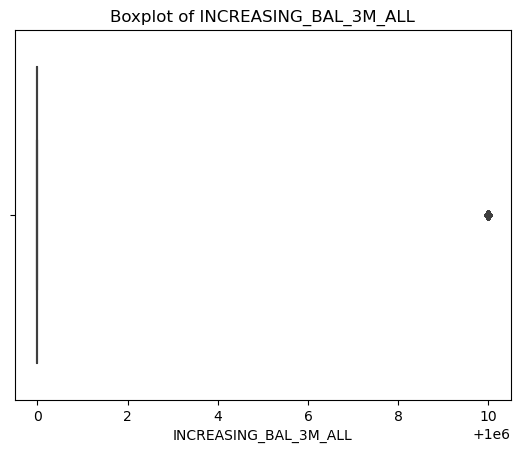

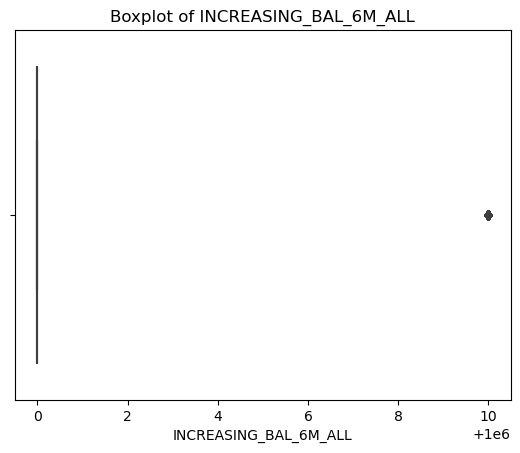

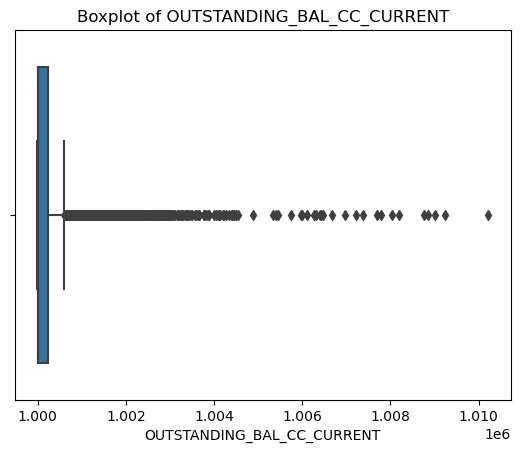

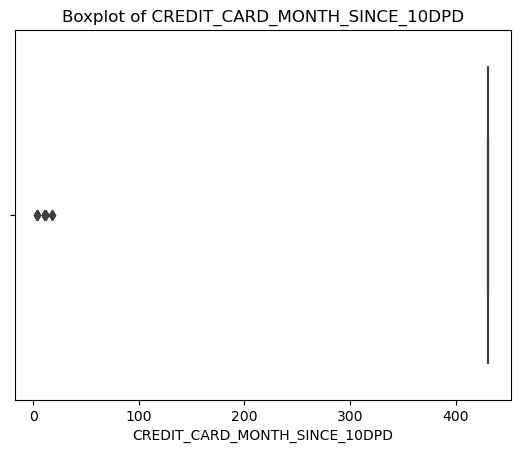

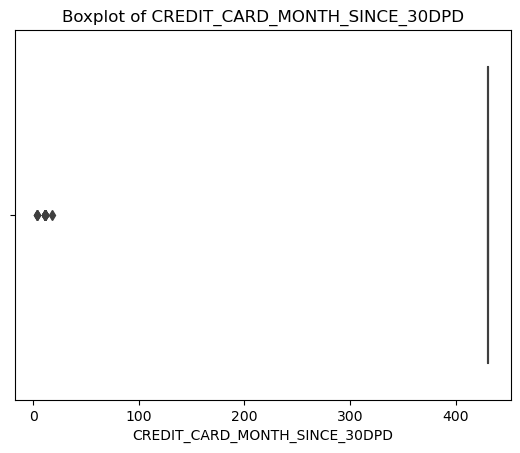

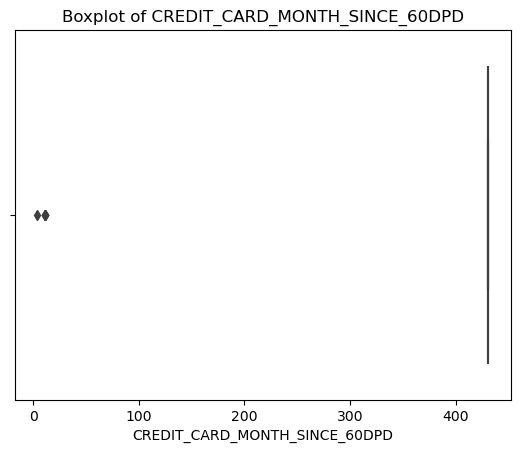

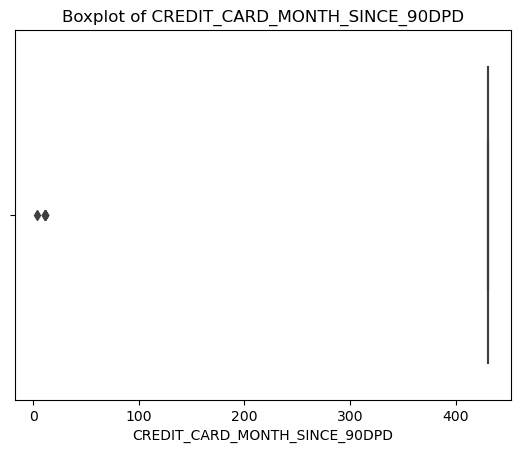

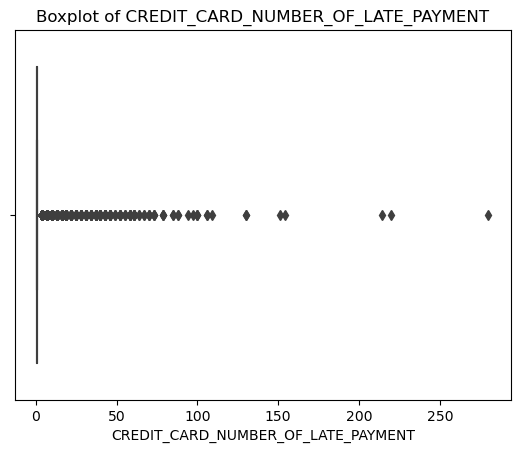

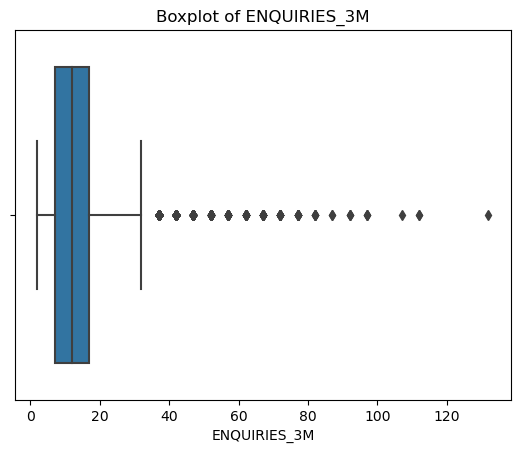

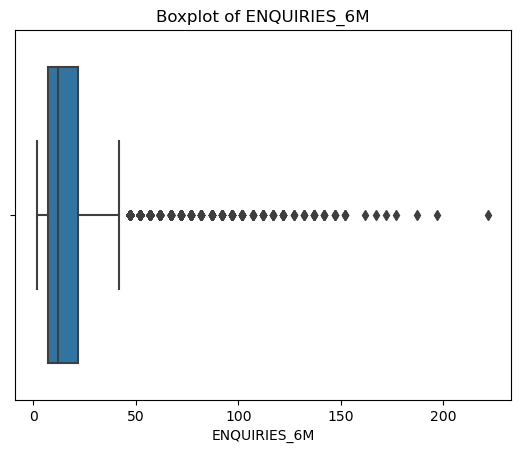

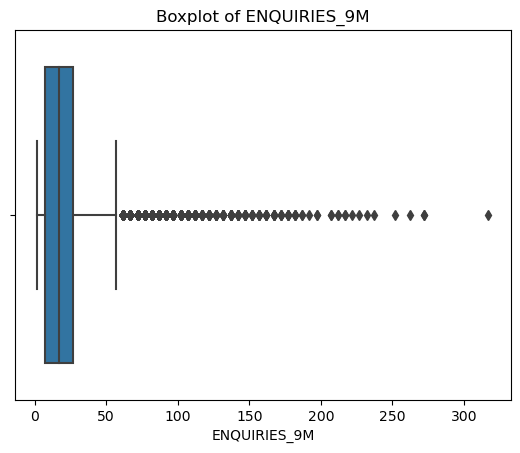

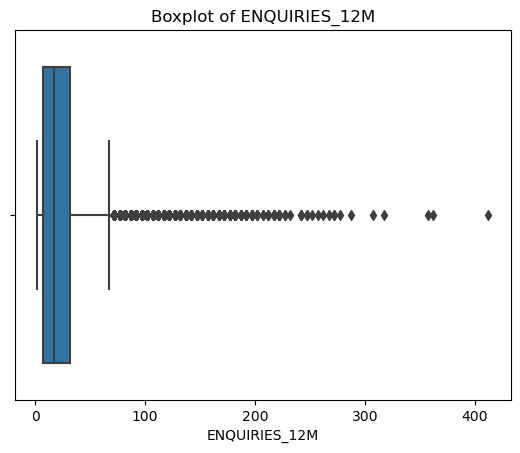

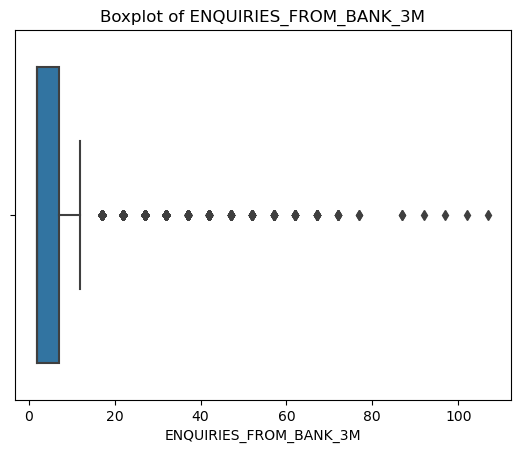

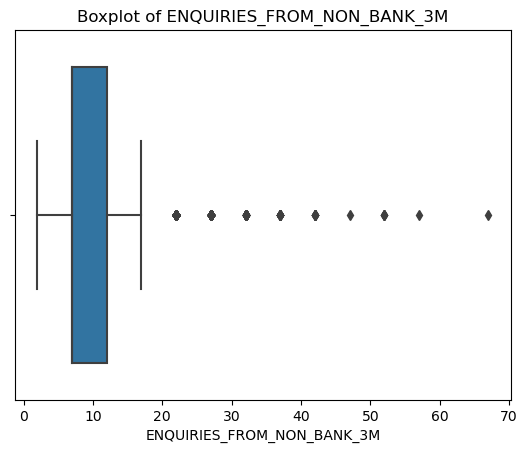

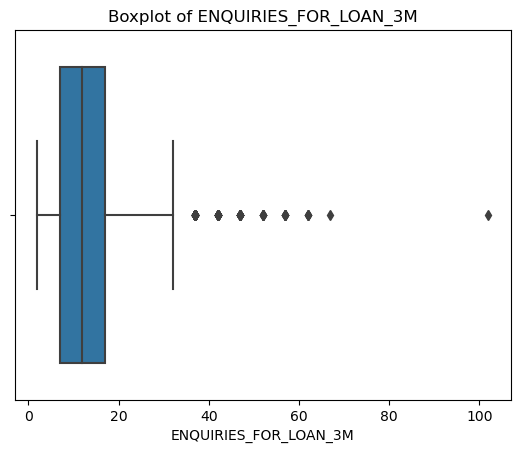

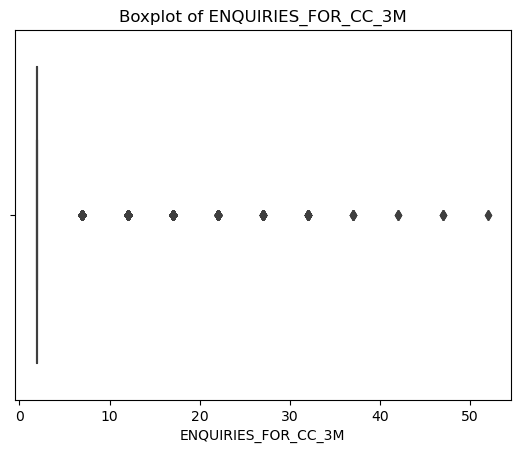

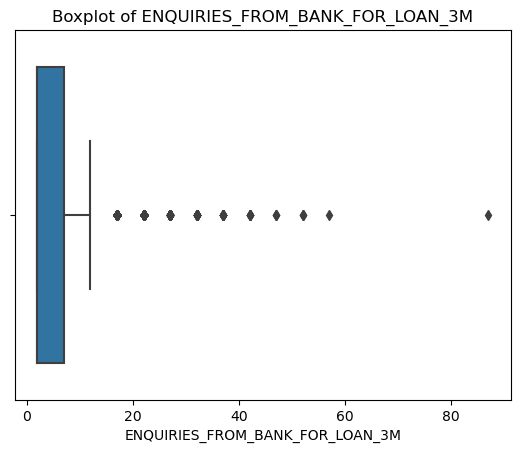

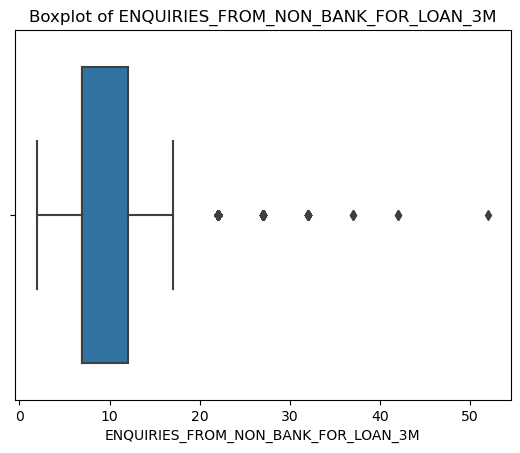

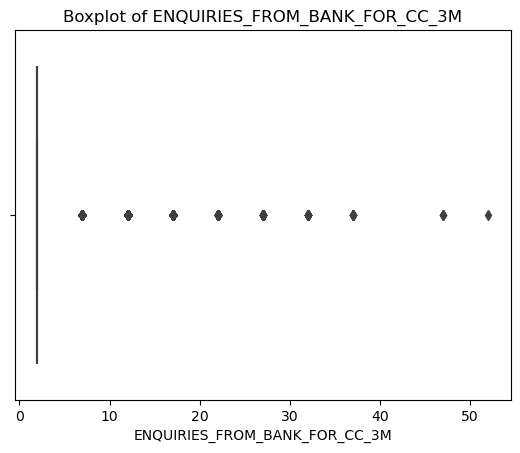

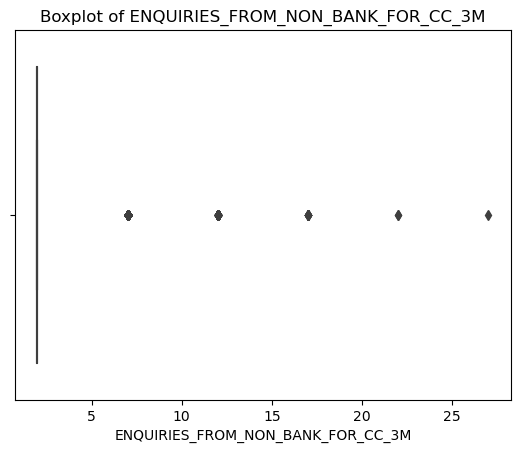

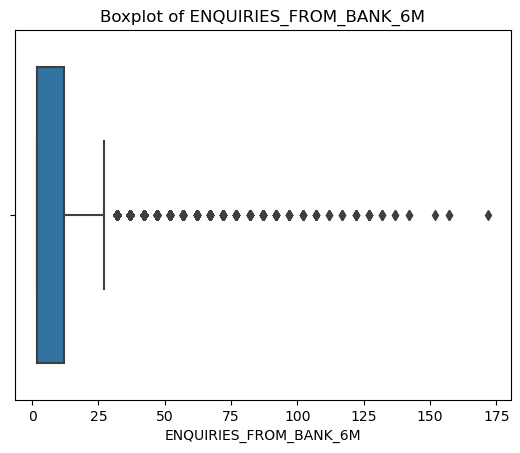

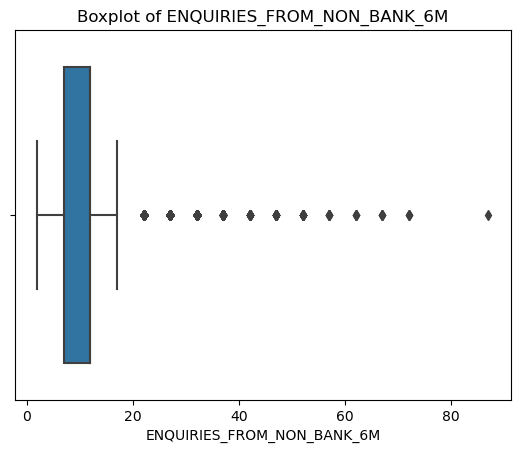

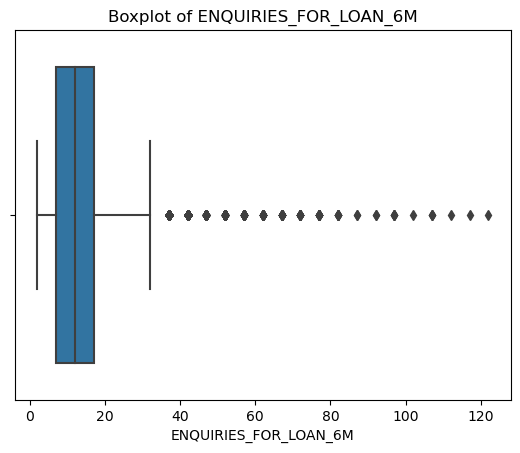

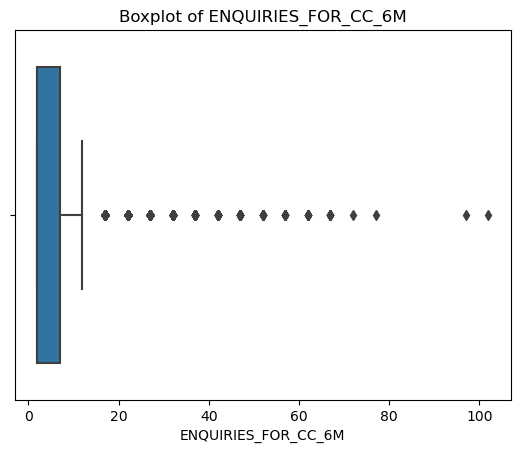

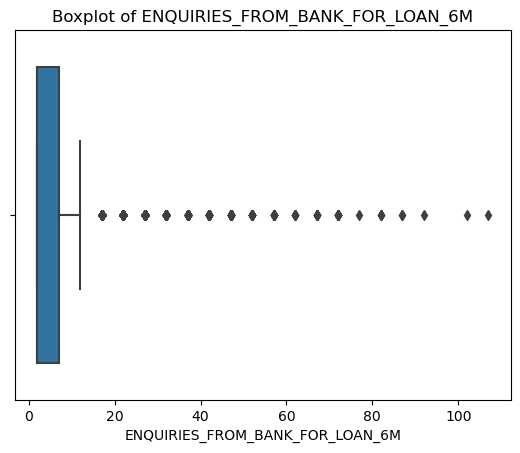

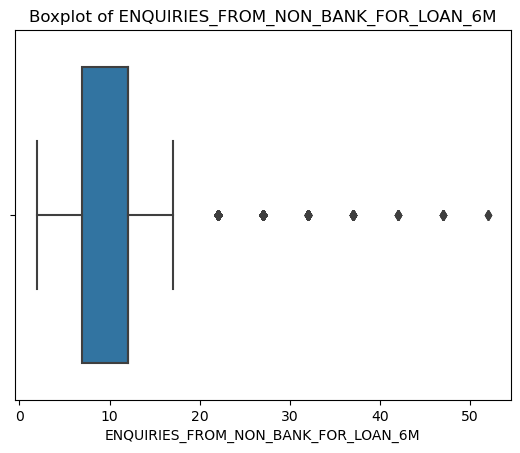

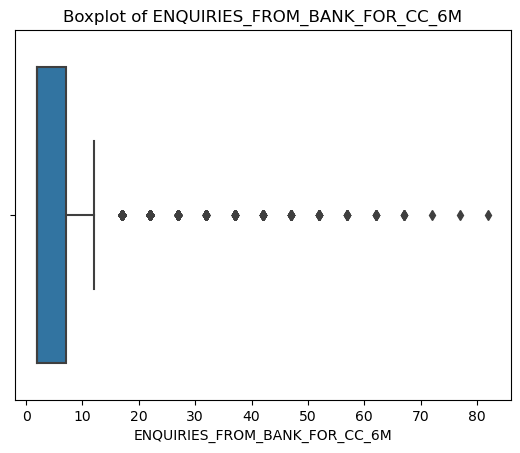

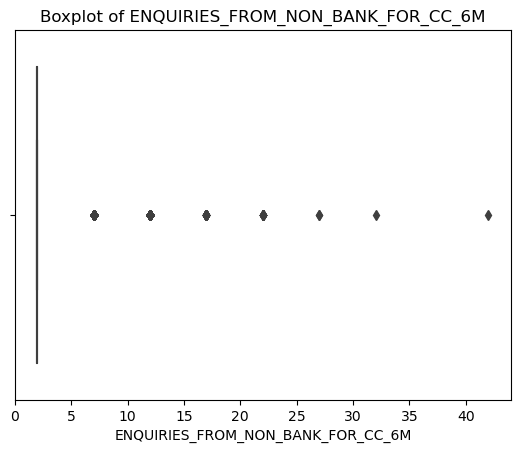

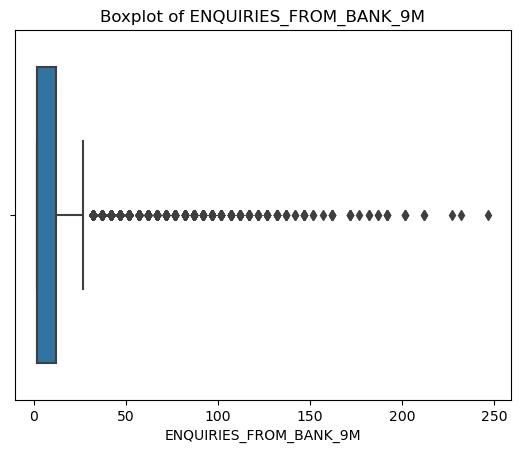

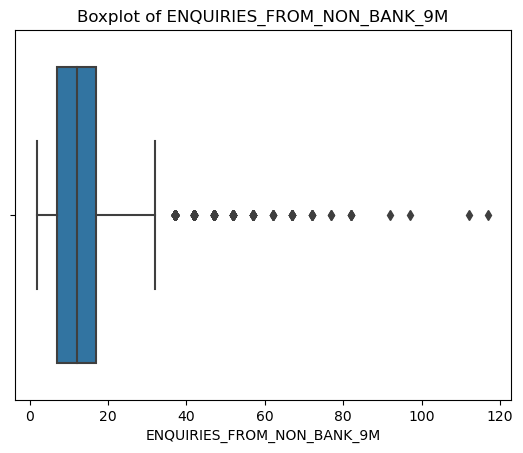

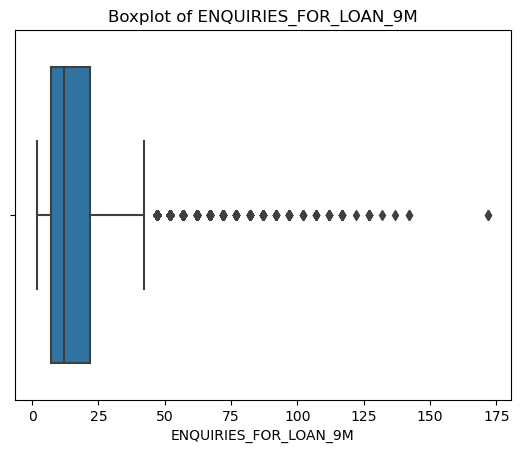

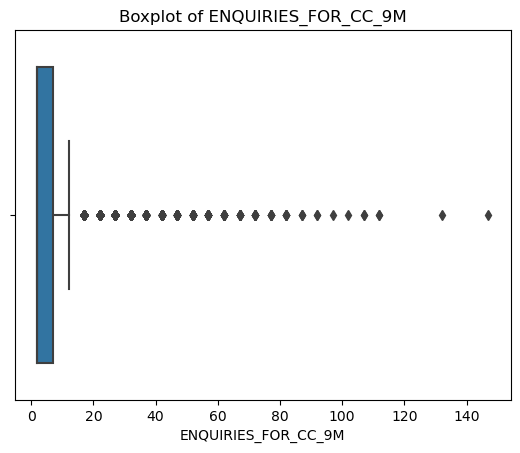

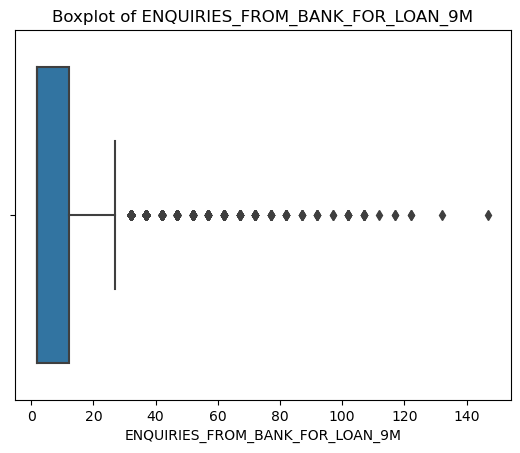

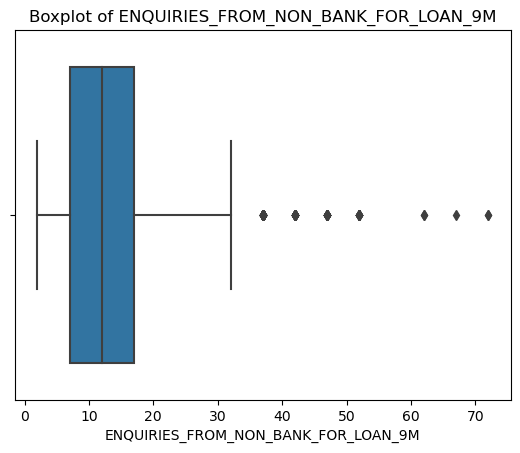

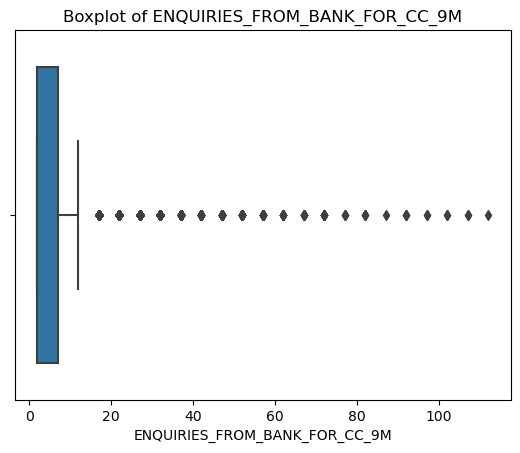

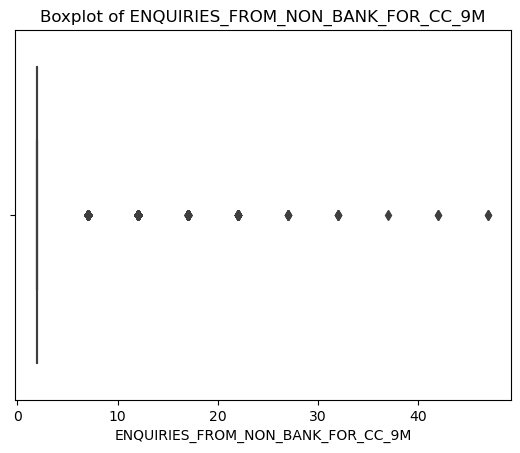

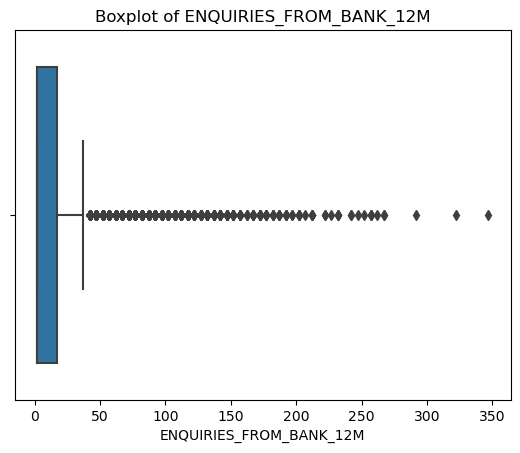

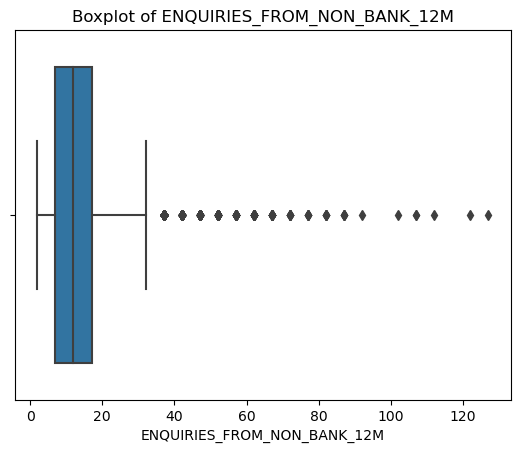

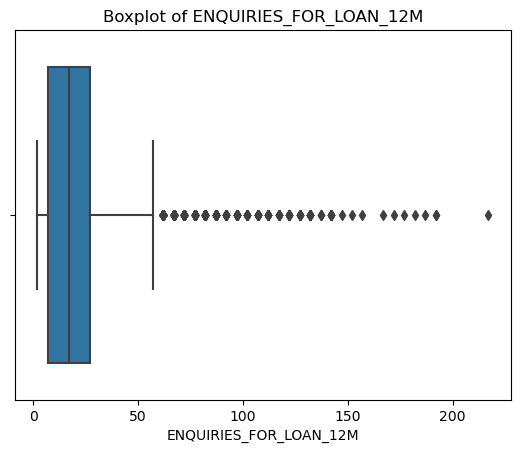

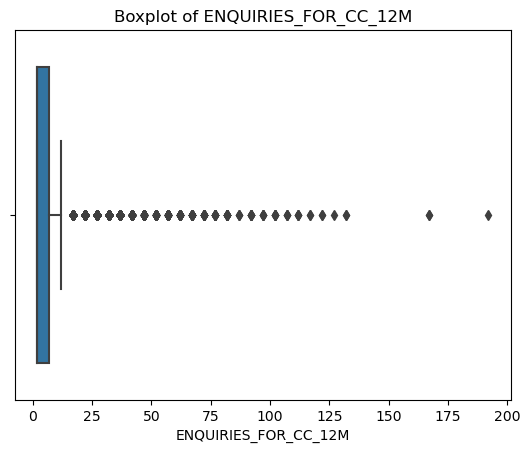

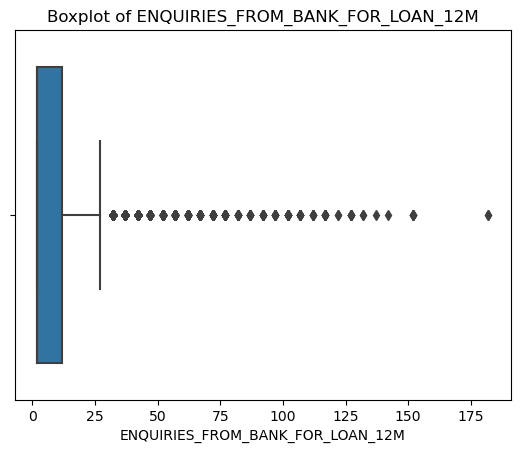

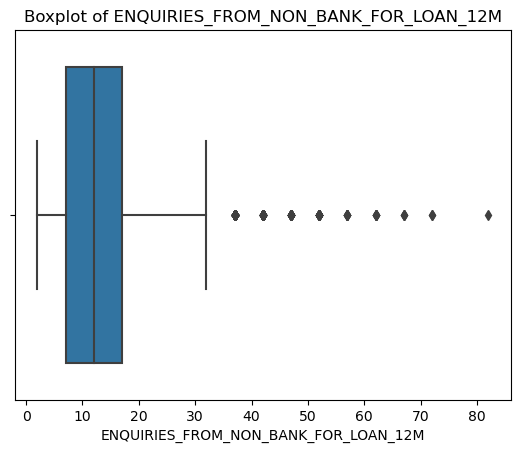

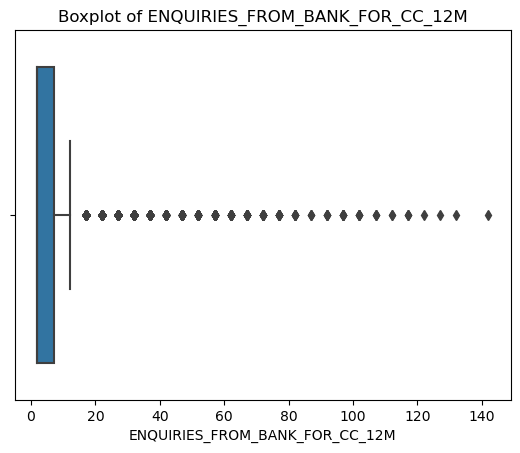

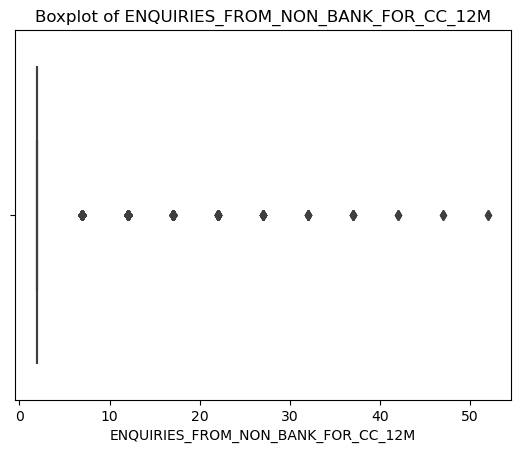

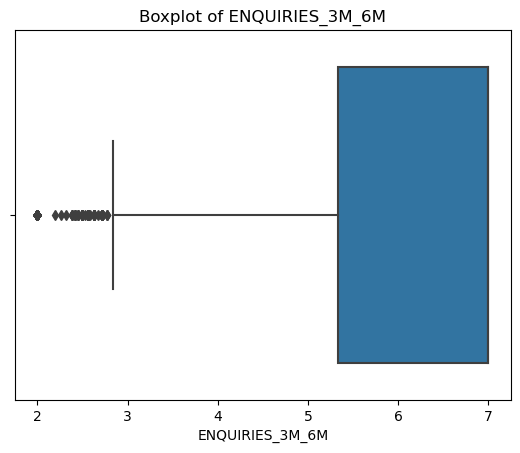

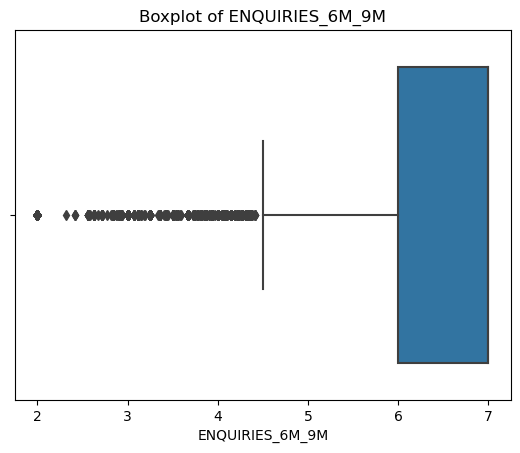

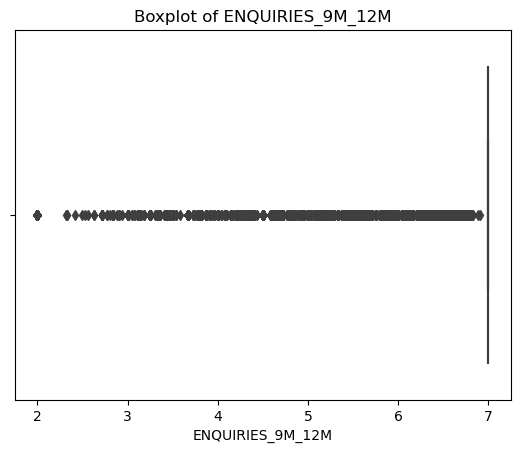

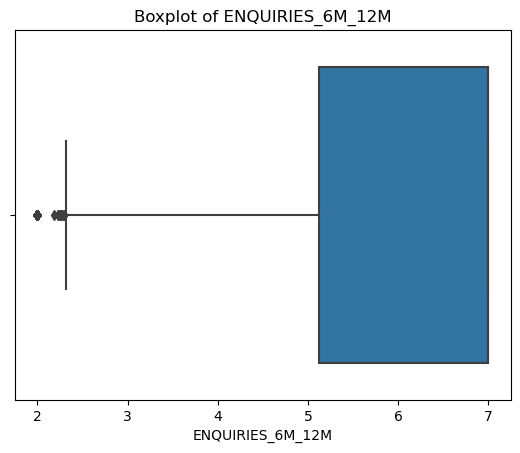

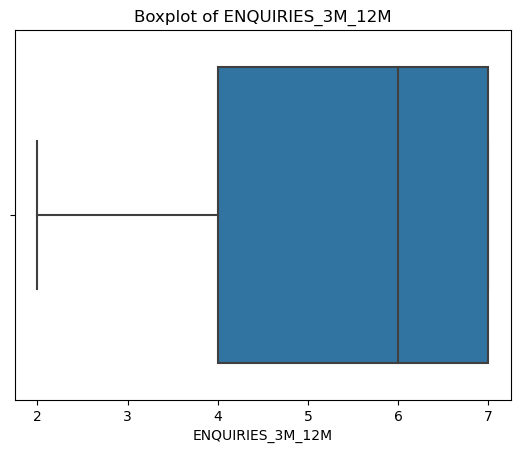

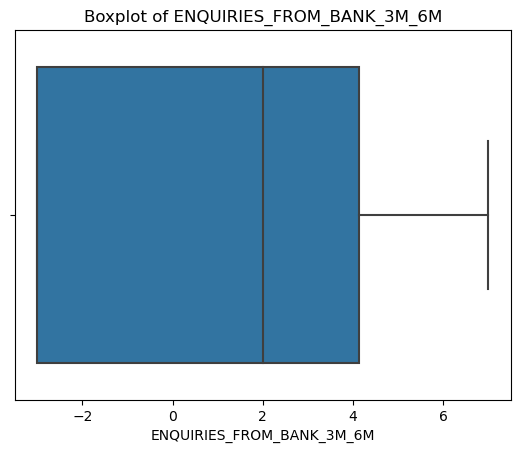

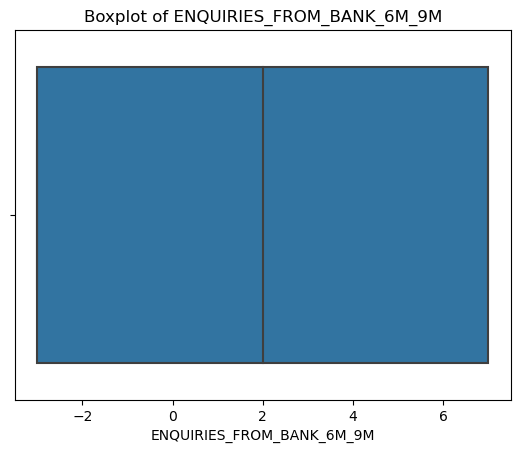

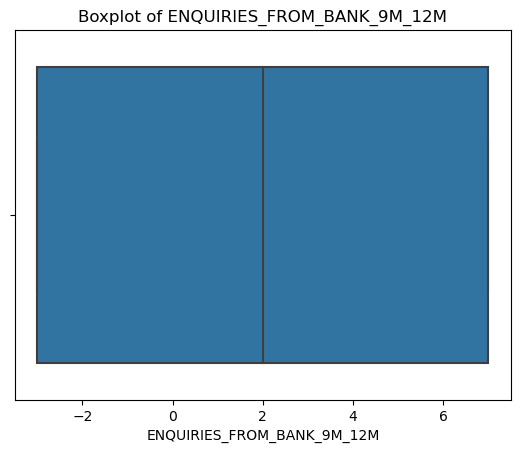

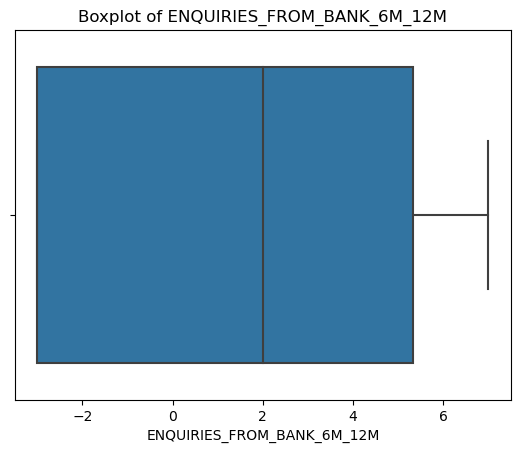

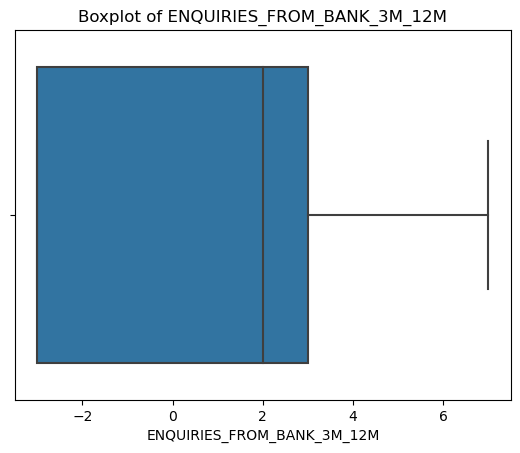

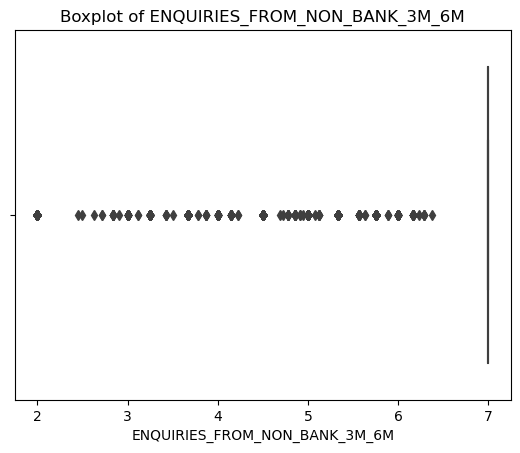

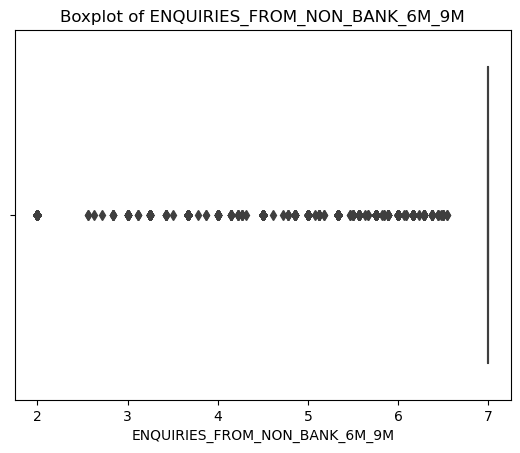

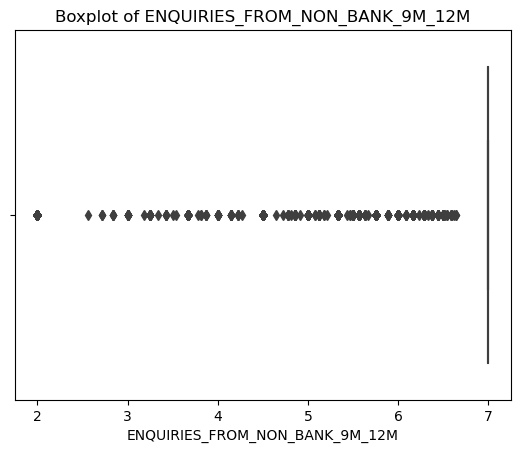

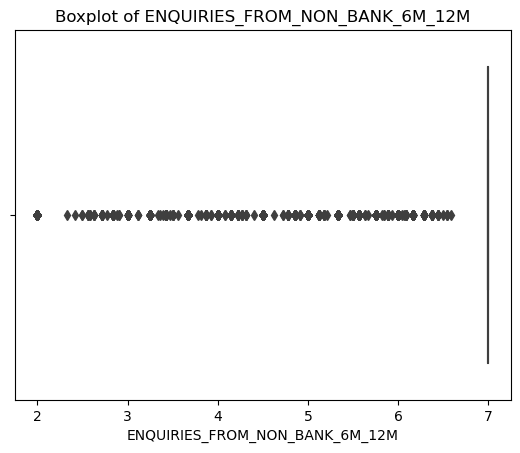

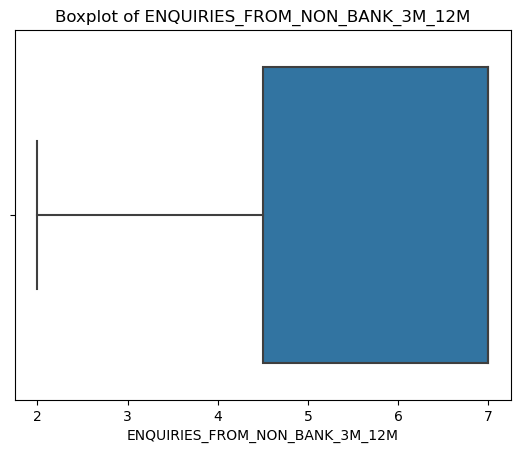

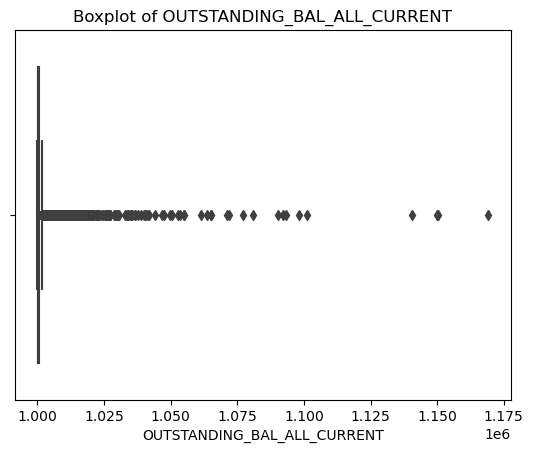

In [10]:
remaining_columns = credit_data.drop(columns=["customer_id", "label"]).columns.tolist()
for c in remaining_columns:
    sns.boxplot(x=c, data=credit_data)
    plt.title(f"Boxplot of {c}")
    plt.show()

In [11]:
remaining_columns

['SHORT_TERM_COUNT',
 'MID_TERM_COUNT',
 'LONG_TERM_COUNT',
 'SHORT_TERM_COUNT_BANK',
 'MID_TERM_COUNT_BANK',
 'LONG_TERM_COUNT_BANK',
 'SHORT_TERM_COUNT_NON_BANK',
 'MID_TERM_COUNT_NON_BANK',
 'LONG_TERM_COUNT_NON_BANK',
 'NUMBER_OF_LOANS',
 'NUMBER_OF_LOANS_BANK',
 'NUMBER_OF_LOANS_NON_BANK',
 'NUMBER_OF_CREDIT_CARDS',
 'NUMBER_OF_CREDIT_CARDS_BANK',
 'NUMBER_OF_CREDIT_CARDS_NON_BANK',
 'NUMBER_OF_RELATIONSHIP',
 'NUMBER_OF_RELATIONSHIP_BANK',
 'NUMBER_OF_RELATIONSHIP_NON_BANK',
 'NUM_NEW_LOAN_TAKEN_3M',
 'NUM_NEW_LOAN_TAKEN_6M',
 'NUM_NEW_LOAN_TAKEN_9M',
 'NUM_NEW_LOAN_TAKEN_12M',
 'NUM_NEW_LOAN_TAKEN_BANK_3M',
 'NUM_NEW_LOAN_TAKEN_BANK_6M',
 'NUM_NEW_LOAN_TAKEN_BANK_9M',
 'NUM_NEW_LOAN_TAKEN_BANK_12M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_3M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_6M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_9M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_12M',
 'OUTSTANDING_BAL_LOAN_CURRENT',
 'OUTSTANDING_BAL_LOAN_3M',
 'OUTSTANDING_BAL_LOAN_6M',
 'OUTSTANDING_BAL_LOAN_9M',
 'OUTSTANDING_BAL_LOAN_12M

## Sử dụng một số những mối quan hệ logic của các cột để điền vào các ô có giá trị null

Cột `SHORT_TERM_COUNT` = `SHORT_TERM_COUNT_BANK` + `SHORT_TERM_COUNT_NON_BANK` - 1

In [12]:
credit_data['SHORT_TERM_COUNT'] = credit_data['SHORT_TERM_COUNT'].fillna(credit_data['SHORT_TERM_COUNT_BANK'] + credit_data['SHORT_TERM_COUNT_NON_BANK']-1)
credit_data['SHORT_TERM_COUNT_BANK'] = credit_data['SHORT_TERM_COUNT_BANK'].fillna(credit_data['SHORT_TERM_COUNT'] - credit_data['SHORT_TERM_COUNT_NON_BANK'] +1)
credit_data['SHORT_TERM_COUNT_NON_BANK'] = credit_data['SHORT_TERM_COUNT_NON_BANK'].fillna(credit_data['SHORT_TERM_COUNT'] - credit_data['SHORT_TERM_COUNT_BANK'] +1)

Cột `MID_TERM_COUNT` = `MID_TERM_COUNT_BANK` + `MID_TERM_COUNT_NON_BANK` - 1

In [13]:
credit_data['MID_TERM_COUNT'] = credit_data['MID_TERM_COUNT'].fillna(credit_data['MID_TERM_COUNT_BANK'] + credit_data['MID_TERM_COUNT_NON_BANK']-1)
credit_data['MID_TERM_COUNT_BANK'] = credit_data['MID_TERM_COUNT_BANK'].fillna(credit_data['MID_TERM_COUNT'] - credit_data['MID_TERM_COUNT_NON_BANK'] +1)
credit_data['MID_TERM_COUNT_NON_BANK'] = credit_data['MID_TERM_COUNT_NON_BANK'].fillna(credit_data['MID_TERM_COUNT'] - credit_data['MID_TERM_COUNT_BANK'] +1)

Cột `LONG_TERM_COUNT` = `LONG_TERM_COUNT_BANK` + `LONG_TERM_COUNT_NON_BANK` - 1

In [14]:
credit_data['LONG_TERM_COUNT'] = credit_data['LONG_TERM_COUNT'].fillna(credit_data['LONG_TERM_COUNT_BANK'] + credit_data['LONG_TERM_COUNT_NON_BANK']-1)
credit_data['LONG_TERM_COUNT_BANK'] = credit_data['LONG_TERM_COUNT_BANK'].fillna(credit_data['LONG_TERM_COUNT'] - credit_data['LONG_TERM_COUNT_NON_BANK'] +1)
credit_data['LONG_TERM_COUNT_NON_BANK'] = credit_data['LONG_TERM_COUNT_NON_BANK'].fillna(credit_data['LONG_TERM_COUNT'] - credit_data['LONG_TERM_COUNT_BANK'] +1)

Cột `NUMBER_OF_LOANS` = `NUMBER_OF_LOANS_BANK` + `NUMBER_OF_LOANS_NON_BANK` -1

In [15]:
credit_data['NUMBER_OF_LOANS'] = credit_data['NUMBER_OF_LOANS'].fillna(credit_data['NUMBER_OF_LOANS_BANK'] + credit_data['NUMBER_OF_LOANS_NON_BANK']-1)
credit_data['NUMBER_OF_LOANS_BANK'] = credit_data['NUMBER_OF_LOANS_BANK'].fillna(credit_data['NUMBER_OF_LOANS'] - credit_data['NUMBER_OF_LOANS_NON_BANK'] +1)
credit_data['NUMBER_OF_LOANS_NON_BANK'] = credit_data['NUMBER_OF_LOANS_NON_BANK'].fillna(credit_data['NUMBER_OF_LOANS'] - credit_data['NUMBER_OF_LOANS_BANK'] +1)

Cột `NUMBER_OF_RELATIONSHIP` = `NUMBER_OF_RELATIONSHIP_BANK` + `NUMBER_OF_RELATIONSHIP_NON_BANK` -1

In [16]:
credit_data['NUMBER_OF_RELATIONSHIP'] = credit_data['NUMBER_OF_RELATIONSHIP'].fillna(credit_data['NUMBER_OF_RELATIONSHIP_BANK'] + credit_data['NUMBER_OF_RELATIONSHIP_NON_BANK']-1)
credit_data['NUMBER_OF_RELATIONSHIP_BANK'] = credit_data['NUMBER_OF_RELATIONSHIP_BANK'].fillna(credit_data['NUMBER_OF_RELATIONSHIP'] - credit_data['NUMBER_OF_RELATIONSHIP_NON_BANK'] +1)
credit_data['NUMBER_OF_RELATIONSHIP_NON_BANK'] = credit_data['NUMBER_OF_RELATIONSHIP_NON_BANK'].fillna(credit_data['NUMBER_OF_RELATIONSHIP'] - credit_data['NUMBER_OF_RELATIONSHIP_BANK'] +1)

So sánh độ tương quan giữa các cột `NUM_NEW_LOAN_TAKEN_3M`, `NUM_NEW_LOAN_TAKEN_BANK_3M`, `NUM_NEW_LOAN_TAKEN_NON_BANK_3M`.
Độ tương quan giữa các cột `NUM_NEW_LOAN_TAKEN_6M`, `NUM_NEW_LOAN_TAKEN_BANK_6M`, `NUM_NEW_LOAN_TAKEN_NON_BANK_6M`
Độ tương quan giữa các cột `NUM_NEW_LOAN_TAKEN_9M`, `NUM_NEW_LOAN_TAKEN_BANK_9M`, `NUM_NEW_LOAN_TAKEN_NON_BANK_9M`
Độ tương quan giữa các cột `NUM_NEW_LOAN_TAKEN_12M`, `NUM_NEW_LOAN_TAKEN_BANK_12M`, `NUM_NEW_LOAN_TAKEN_NON_BANK_12M`

In [17]:
def correlation(df, periods):
    correlations = {}
    for period in periods:
        loan_col = f'NUM_NEW_LOAN_TAKEN_{period}M'
        bank_col = f'NUM_NEW_LOAN_TAKEN_BANK_{period}M'
        non_bank_col = f'NUM_NEW_LOAN_TAKEN_NON_BANK_{period}M'
        correlation_matrix = df[[loan_col, bank_col, non_bank_col]].corr()
        correlations[period] = correlation_matrix
    return correlations
periods = [3, 6, 9, 12]
correlations = correlation(credit_data, periods)
for period, corr_matrix in correlations.items():
    print(f"Correlation matrix for {period} months:")
    print(corr_matrix)
    print("\n")

Correlation matrix for 3 months:
                                NUM_NEW_LOAN_TAKEN_3M  \
NUM_NEW_LOAN_TAKEN_3M                            1.00   
NUM_NEW_LOAN_TAKEN_BANK_3M                       1.00   
NUM_NEW_LOAN_TAKEN_NON_BANK_3M                   1.00   

                                NUM_NEW_LOAN_TAKEN_BANK_3M  \
NUM_NEW_LOAN_TAKEN_3M                                 1.00   
NUM_NEW_LOAN_TAKEN_BANK_3M                            1.00   
NUM_NEW_LOAN_TAKEN_NON_BANK_3M                        1.00   

                                NUM_NEW_LOAN_TAKEN_NON_BANK_3M  
NUM_NEW_LOAN_TAKEN_3M                                     1.00  
NUM_NEW_LOAN_TAKEN_BANK_3M                                1.00  
NUM_NEW_LOAN_TAKEN_NON_BANK_3M                            1.00  


Correlation matrix for 6 months:
                                NUM_NEW_LOAN_TAKEN_6M  \
NUM_NEW_LOAN_TAKEN_6M                            1.00   
NUM_NEW_LOAN_TAKEN_BANK_6M                       1.00   
NUM_NEW_LOAN_TAKEN_NON_

Từ bảng tương quan này, nhóm quyết định điền giá trị null ở các cột tương ứng bằng giá trị của các cột khác có độ tương quan cao với cột được chọn

In [18]:
def fill_nan_for_loans(df, periods):
    for period in periods:
        loan_col = f'NUM_NEW_LOAN_TAKEN_{period}M'
        bank_col = f'NUM_NEW_LOAN_TAKEN_BANK_{period}M'
        non_bank_col = f'NUM_NEW_LOAN_TAKEN_NON_BANK_{period}M'
        
        
        df[loan_col] = df[loan_col].fillna(df[bank_col].fillna(df[non_bank_col]))
        df[bank_col] = df[bank_col].fillna(df[loan_col].fillna(df[non_bank_col]))
        df[non_bank_col] = df[non_bank_col].fillna(df[bank_col].fillna(df[bank_col]))
    
    

periods = [3, 6, 9, 12]

fill_nan_for_loans(credit_data, periods)

In [19]:
def fill_nan_for_outstanding_bal(row, periods):
    for period in periods:
        bal_all = f'OUTSTANDING_BAL_ALL_{period}M'
        bal_loan = f'OUTSTANDING_BAL_LOAN_{period}M'
        bal_cc = f'OUTSTANDING_BAL_CC_{period}M'
        
        if row[bal_cc] == 1000000 and row[bal_loan] == 1000000: 
            row[bal_all] = row[bal_all] if pd.notna(row[bal_all]) else row[bal_loan]
        
        elif row[bal_all] == 1000000 and row[bal_loan] == 1000000:
            row[bal_cc] = row[bal_cc] if pd.notna(row[bal_cc]) else row[bal_loan]
        
        if row[bal_loan] == 1000000 and row[bal_cc] > 1000000:
            row[bal_all] = row[bal_all] if pd.notna(row[bal_all]) else row[bal_cc]
        
        if row[bal_loan] > 1000000 and row[bal_cc] > 1000000 and pd.isna(row[bal_all]):
            row[bal_all] = row[bal_loan] + (row[bal_cc] - 1000000)
        elif row[bal_loan] > 1000000 and pd.isna(row[bal_cc]) and row[bal_all] > 1000000:
            row[bal_cc] = row[bal_all] - (row[bal_loan] - 1000000)
        elif pd.isna(row[bal_loan]) and row[bal_cc] > 1000000 and row[bal_all] > 1000000:
            row[bal_loan] = row[bal_all] - (row[bal_cc] - 1000000)
        elif row[bal_loan] > 1000000 and row[bal_cc] < 1000000 and pd.isna(row[bal_all]):
            row[bal_all] = row[bal_loan]
        elif pd.isna(row[bal_loan]) and row[bal_cc] < 1000000 and row[bal_all] > 1000000:
            row[bal_loan] = row[bal_all]

    return row

periods = [3, 6, 9, 12]
credit_data = credit_data.apply(fill_nan_for_outstanding_bal, axis=1, periods=periods)

In [20]:
def fill_nan_for_increasing_bal(row, periods):
    for period in periods:
        bal_all = f'INCREASING_BAL_{period}M_ALL'
        bal_loan = f'INCREASING_BAL_{period}M_LOAN'
        bal_cc = f'INCREASING_BAL_{period}M_CC'
        
        if pd.notna(row[bal_cc]) and pd.notna(row[bal_loan]):
            if row[bal_cc] == 1000000 and row[bal_loan] == 1000000:
                row[bal_all] = row[bal_all] if pd.notna(row[bal_all]) else row[bal_loan]
            elif row[bal_cc] == 1000010 and row[bal_loan] == 1000000:
                row[bal_all] = row[bal_all] if pd.notna(row[bal_all]) else row[bal_cc]
            elif row[bal_cc] == 1000000 and row[bal_loan] == 1000010:
                row[bal_all] = row[bal_all] if pd.notna(row[bal_all]) else row[bal_loan]
            elif row[bal_cc] == 1000010 and row[bal_loan] == 1000010:
                row[bal_all] = row[bal_all] if pd.notna(row[bal_all]) else row[bal_loan]
                
        if pd.notna(row[bal_cc]) and row[bal_cc] <= 1000000 and pd.isna(row[bal_all]):
            row[bal_all] = row[bal_loan]
        elif pd.isna(row[bal_cc]) and pd.notna(row[bal_all]) and pd.notna(row[bal_loan]):
            row[bal_cc] = row[bal_all]
        elif pd.isna(row[bal_loan]) and pd.notna(row[bal_cc]) and pd.notna(row[bal_all]):
            row[bal_loan] = row[bal_all]
        
    return row

periods = [3, 6]
credit_data = credit_data.apply(fill_nan_for_increasing_bal, axis=1, periods=periods)

In [21]:
def fill_nan_for_enquiries(df, periods):
    for period in periods:
        enq_col = f'ENQUIRIES_{period}M'
        enq_bank_col = f'ENQUIRIES_FROM_BANK_{period}M'
        enq_non_bank_col = f'ENQUIRIES_FROM_NON_BANK_{period}M'
        
        
        df[enq_col] = df[enq_col].fillna(df[enq_bank_col] + df[enq_non_bank_col] -2)
        df[enq_bank_col] = df[enq_bank_col].fillna(df[enq_col] - df[enq_non_bank_col] +2)
        df[enq_non_bank_col] = df[enq_non_bank_col].fillna(df[enq_col] - df[enq_bank_col] +2)
    
periods = [3, 6, 9, 12]

fill_nan_for_enquiries(credit_data, periods)

In [22]:
def fill_nan_for_enquiries_loan(df, periods):
    for period in periods:
        enq_loan_col = f'ENQUIRIES_FOR_LOAN_{period}M'
        enq_bank_loan_col = f'ENQUIRIES_FROM_BANK_FOR_LOAN_{period}M'
        enq_non_bank_loan_col = f'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_{period}M'
        
        
        df[enq_loan_col] = df[enq_loan_col].fillna(df[enq_bank_loan_col] + df[enq_non_bank_loan_col] -2)
        df[enq_bank_loan_col] = df[enq_bank_loan_col].fillna(df[enq_loan_col] - df[enq_non_bank_loan_col] +2)
        df[enq_non_bank_loan_col] = df[enq_non_bank_loan_col].fillna(df[enq_loan_col] - df[enq_bank_loan_col] +2)
    
periods = [3, 6, 9, 12]

fill_nan_for_enquiries_loan(credit_data, periods)

In [23]:
def fill_nan_for_enquiries_cc(df, periods):
    for period in periods:
        enq_cc_col = f'ENQUIRIES_FOR_CC_{period}M'
        enq_bank_cc_col = f'ENQUIRIES_FROM_BANK_FOR_CC_{period}M'
        enq_non_bank_cc_col = f'ENQUIRIES_FROM_NON_BANK_FOR_CC_{period}M'
        
        
        df[enq_cc_col] = df[enq_cc_col].fillna(df[enq_bank_cc_col] + df[enq_non_bank_cc_col] -2)
        df[enq_bank_cc_col] = df[enq_bank_cc_col].fillna(df[enq_cc_col] - df[enq_non_bank_cc_col] +2)
        df[enq_non_bank_cc_col] = df[enq_non_bank_cc_col].fillna(df[enq_cc_col] - df[enq_bank_cc_col] +2)
    
periods = [3, 6, 9, 12]

fill_nan_for_enquiries_cc(credit_data, periods)

In [24]:
def fill_nan_for_enquiries_xM_xM(row, periods):
    for period in periods:
        enquiries_all = f'ENQUIRIES_{period}'
        enquiries_bank = f'ENQUIRIES_FROM_BANK_{period}'
        enquiries_non_bank = f'ENQUIRIES_FROM_NON_BANK_{period}'
                
        if pd.notna(row[enquiries_all]) and row[enquiries_bank] < 0:
            row[enquiries_non_bank] = row[enquiries_non_bank] if pd.notna(row[enquiries_non_bank]) else row[enquiries_all]
        if pd.notna(row[enquiries_non_bank]) and row[enquiries_bank] < 0:
            row[enquiries_all] = row[enquiries_all] if pd.notna(row[enquiries_all]) else row[enquiries_non_bank]
        

    return row

periods = ['3M_6M', '6M_9M', '9M_12M', '6M_12M', '3M_12M']

credit_data = credit_data.apply(fill_nan_for_enquiries_xM_xM, axis=1, periods=periods)

In [25]:
def fill_outstanding_bal(row):

    if pd.notna(row['OUTSTANDING_BAL_CC_CURRENT']) and pd.notna(row['OUTSTANDING_BAL_LOAN_CURRENT']):
        if row['OUTSTANDING_BAL_CC_CURRENT'] <= 1000000:
            row['OUTSTANDING_BAL_ALL_CURRENT'] = row['OUTSTANDING_BAL_ALL_CURRENT'] if pd.notna(row['OUTSTANDING_BAL_ALL_CURRENT']) else row['OUTSTANDING_BAL_LOAN_CURRENT']
        elif row['OUTSTANDING_BAL_LOAN_CURRENT'] == 1000000 and row['OUTSTANDING_BAL_CC_CURRENT'] == 1000000:
            row['OUTSTANDING_BAL_ALL_CURRENT'] = 1000000
        elif row['OUTSTANDING_BAL_LOAN_CURRENT'] > 1000000 and row['OUTSTANDING_BAL_CC_CURRENT'] > 1000000:
            row['OUTSTANDING_BAL_ALL_CURRENT'] = row['OUTSTANDING_BAL_ALL_CURRENT'] if pd.notna(row['OUTSTANDING_BAL_ALL_CURRENT']) else ((row['OUTSTANDING_BAL_LOAN_CURRENT'] - 1000000) + row['OUTSTANDING_BAL_CC_CURRENT'])

    if pd.notna(row['OUTSTANDING_BAL_CC_CURRENT']) and pd.notna(row['OUTSTANDING_BAL_ALL_CURRENT']):
        if row['OUTSTANDING_BAL_CC_CURRENT'] <= 1000000:
            row['OUTSTANDING_BAL_LOAN_CURRENT'] = row['OUTSTANDING_BAL_LOAN_CURRENT'] if pd.notna(row['OUTSTANDING_BAL_LOAN_CURRENT']) else row['OUTSTANDING_BAL_ALL_CURRENT']
        else:
            row['OUTSTANDING_BAL_LOAN_CURRENT'] = row['OUTSTANDING_BAL_LOAN_CURRENT'] if pd.notna(row['OUTSTANDING_BAL_LOAN_CURRENT']) else (row['OUTSTANDING_BAL_ALL_CURRENT'] - (row['OUTSTANDING_BAL_CC_CURRENT'] - 1000000))

    if pd.notna(row['OUTSTANDING_BAL_LOAN_CURRENT']) and pd.notna(row['OUTSTANDING_BAL_ALL_CURRENT']):
        if row['OUTSTANDING_BAL_LOAN_CURRENT'] == 1000000 and row['OUTSTANDING_BAL_ALL_CURRENT'] == 1000000:
            row['OUTSTANDING_BAL_CC_CURRENT'] = row['OUTSTANDING_BAL_CC_CURRENT'] if pd.notna(row['OUTSTANDING_BAL_CC_CURRENT']) else row['OUTSTANDING_BAL_ALL_CURRENT']
        elif row['OUTSTANDING_BAL_LOAN_CURRENT'] == row['OUTSTANDING_BAL_CC_CURRENT']:
            row['OUTSTANDING_BAL_CC_CURRENT'] = row['OUTSTANDING_BAL_CC_CURRENT'] if pd.notna(row['OUTSTANDING_BAL_CC_CURRENT']) else 1000000
        elif row['OUTSTANDING_BAL_LOAN_CURRENT'] > 1000000 and row['OUTSTANDING_BAL_ALL_CURRENT'] > 1000000:
            row['OUTSTANDING_BAL_CC_CURRENT'] = row['OUTSTANDING_BAL_CC_CURRENT'] if pd.notna(row['OUTSTANDING_BAL_CC_CURRENT']) else (row['OUTSTANDING_BAL_ALL_CURRENT'] - (row['OUTSTANDING_BAL_LOAN_CURRENT'] - 1000000))

    return row

credit_data = credit_data.apply(fill_outstanding_bal, axis=1)

Đối với các giá trị null còn lại của các cột sau `INCREASING_BAL_3M_ALL`, `INCREASING_BAL_3M_LOAN`, `INCREASING_BAL_3M_CC`, `INCREASING_BAL_6M_ALL`, `INCREASING_BAL_6M_LOAN`, `INCREASING_BAL_6M_CC`, `ENQUIRIES_3M_6M`, `ENQUIRIES_FROM_BANK_3M_6M`, `ENQUIRIES_FROM_NON_BANK_3M_6M`, `ENQUIRIES_6M_9M`, `ENQUIRIES_FROM_BANK_6M_9M`, `ENQUIRIES_FROM_NON_BANK_6M_9M`, `ENQUIRIES_9M_12M`, `ENQUIRIES_FROM_BANK_9M_12M`, `ENQUIRIES_FROM_NON_BANK_9M_12M`, `ENQUIRIES_6M_12M`, `ENQUIRIES_FROM_BANK_6M_12M`, `ENQUIRIES_FROM_NON_BANK_6M_12M`, `ENQUIRIES_3M_12M`, `ENQUIRIES_FROM_BANK_3M_12M`, `ENQUIRIES_FROM_NON_BANK_3M_12M`, `CREDIT_CARD_MONTH_SINCE_10DPD`, `CREDIT_CARD_MONTH_SINCE_30DPD`, `CREDIT_CARD_MONTH_SINCE_60DPD`, `CREDIT_CARD_MONTH_SINCE_90DPD` thì nên dùng giá trị xuất hiện nhiều nhất để điền

In [26]:
def fill_nan_with_mode_for_columns(df, columns):
    for col in columns:
        # Điền giá trị null bằng giá trị mode (xuất hiện nhiều nhất)
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df
columns_to_fill = [
    'INCREASING_BAL_3M_ALL', 'INCREASING_BAL_3M_LOAN', 'INCREASING_BAL_3M_CC',
    'INCREASING_BAL_6M_ALL', 'INCREASING_BAL_6M_LOAN', 'INCREASING_BAL_6M_CC',
    'ENQUIRIES_3M_6M', 'ENQUIRIES_FROM_BANK_3M_6M', 'ENQUIRIES_FROM_NON_BANK_3M_6M',
    'ENQUIRIES_6M_9M', 'ENQUIRIES_FROM_BANK_6M_9M', 'ENQUIRIES_FROM_NON_BANK_6M_9M',
    'ENQUIRIES_9M_12M', 'ENQUIRIES_FROM_BANK_9M_12M', 'ENQUIRIES_FROM_NON_BANK_9M_12M',
    'ENQUIRIES_6M_12M', 'ENQUIRIES_FROM_BANK_6M_12M', 'ENQUIRIES_FROM_NON_BANK_6M_12M',
    'ENQUIRIES_3M_12M', 'ENQUIRIES_FROM_BANK_3M_12M', 'ENQUIRIES_FROM_NON_BANK_3M_12M',
    'CREDIT_CARD_MONTH_SINCE_10DPD', 'CREDIT_CARD_MONTH_SINCE_30DPD',
    'CREDIT_CARD_MONTH_SINCE_60DPD', 'CREDIT_CARD_MONTH_SINCE_90DPD'
]

credit_data = fill_nan_with_mode_for_columns(credit_data, columns_to_fill)


Đối với các giá trị null còn lại, nhóm sẽ so sánh 4 phương pháp điền giá trị null để xem phương pháp nào đem lại hiệu quả cao nhất. Để việc so sánh được thuận tiện nhất, nhóm quyết định sử dụng mô hình Random Forest Classifier

In [27]:
X = credit_data.drop(columns=["customer_id", "label"])
y = credit_data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
imputers = {
    'Mean Imputation': SimpleImputer(strategy='mean'),
    'Median Imputation': SimpleImputer(strategy='median'),
    'Most Frequent Imputation': SimpleImputer(strategy='most_frequent'),
    'KNN Imputation': KNNImputer(n_neighbors=5)
}
results = {}
for name, imputer in imputers.items():
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    model = RandomForestClassifier(random_state=42)
    score = cross_val_score(model, X_train_imputed, y_train, cv=5) 
    results[name] = score.mean()
for name, score in results.items():
    print(f"{name}: {score:.4f}")

Mean Imputation: 0.8916
Median Imputation: 0.8914
Most Frequent Imputation: 0.8909
KNN Imputation: 0.8913


In [28]:
max_imputer = max(results, key=results.get)
max_score = results[max_imputer]
print(f"Phương pháp Impute có số điểm trung bình cao nhất: {max_imputer}: {max_score:.4f}")

Phương pháp Impute có số điểm trung bình cao nhất: Mean Imputation: 0.8916


Có thể thấy phương pháp Mean Imputation sẽ cho ra mô hình có hiệu suất cao nhất. Vậy nên sẽ dùng phương pháp này để điền giá trị vào các giá trị null.

In [29]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(credit_data)
imputed_credit_data = imputer.transform(credit_data)
imputed_credit_data = pd.DataFrame(imputed_credit_data, columns=credit_data.columns)
imputed_credit_data.head(10)

,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,NUMBER_OF_LOANS_BANK,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_CREDIT_CARDS,NUMBER_OF_CREDIT_CARDS_BANK,NUMBER_OF_CREDIT_CARDS_NON_BANK,NUMBER_OF_RELATIONSHIP,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_3M,NUM_NEW_LOAN_TAKEN_BANK_6M,NUM_NEW_LOAN_TAKEN_BANK_9M,NUM_NEW_LOAN_TAKEN_BANK_12M,NUM_NEW_LOAN_TAKEN_NON_BANK_3M,NUM_NEW_LOAN_TAKEN_NON_BANK_6M,NUM_NEW_LOAN_TAKEN_NON_BANK_9M,NUM_NEW_LOAN_TAKEN_NON_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_6M,OUTSTANDING_BAL_ALL_9M,OUTSTANDING_BAL_ALL_12M,OUTSTANDING_BAL_LOAN_3M_6M,OUTSTANDING_BAL_LOAN_6M_9M,OUTSTANDING_BAL_LOAN_9M_12M,OUTSTANDING_BAL_LOAN_6M_12M,OUTSTANDING_BAL_LOAN_3M_12M,OUTSTANDING_BAL_CC_3M_6M,OUTSTANDING_BAL_CC_6M_9M,OUTSTANDING_BAL_CC_9M_12M,OUTSTANDING_BAL_CC_6M_12M,OUTSTANDING_BAL_CC_3M_12M,OUTSTANDING_BAL_ALL_3M_6M,OUTSTANDING_BAL_ALL_6M_9M,OUTSTANDING_BAL_ALL_9M_12M,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M,INCREASING_BAL_3M_LOAN,INCREASING_BAL_6M_LOAN,INCREASING_BAL_3M_CC,INCREASING_BAL_6M_CC,INCREASING_BAL_3M_ALL,INCREASING_BAL_6M_ALL,OUTSTANDING_BAL_CC_CURRENT,CREDIT_CARD_MONTH_SINCE_10DPD,CREDIT_CARD_MONTH_SINCE_30DPD,CREDIT_CARD_MONTH_SINCE_60DPD,CREDIT_CARD_MONTH_SINCE_90DPD,CREDIT_CARD_NUMBER_OF_LATE_PAYMENT,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_BANK_FOR_CC_3M,ENQUIRIES_FROM_NON_BANK_FOR_CC_3M,ENQUIRIES_FROM_BANK_6M,ENQUIRIES_FROM_NON_BANK_6M,ENQUIRIES_FOR_LOAN_6M,ENQUIRIES_FOR_CC_6M,ENQUIRIES_FROM_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_BANK_FOR_CC_6M,ENQUIRIES_FROM_NON_BANK_FOR_CC_6M,ENQUIRIES_FROM_BANK_9M,ENQUIRIES_FROM_NON_BANK_9M,ENQUIRIES_FOR_LOAN_9M,ENQUIRIES_FOR_CC_9M,ENQUIRIES_FROM_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_BANK_FOR_CC_9M,ENQUIRIES_FROM_NON_BANK_FOR_CC_9M,ENQUIRIES_FROM_BANK_12M,ENQUIRIES_FROM_NON_BANK_12M,ENQUIRIES_FOR_LOAN_12M,ENQUIRIES_FOR_CC_12M,ENQUIRIES_FROM_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_BANK_FOR_CC_12M,ENQUIRIES_FROM_NON_BANK_FOR_CC_12M,ENQUIRIES_3M_6M,ENQUIRIES_6M_9M,ENQUIRIES_9M_12M,ENQUIRIES_6M_12M,ENQUIRIES_3M_12M,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
0,"1,639.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,"1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,205.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,205.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00",431.00,431.00,431.00,431.00,1.00,7.00,7.00,17.00,17.00,2.00,7.00,7.00,2.00,2.00,7.00,2.00,2.00,2.00,7.00,7.00,2.00,2.00,7.00,2.00,2.00,2.00,17.00,12.00,7.00,2.00,12.00,2.00,7.0

In [30]:
imputed_credit_data.isnull().any()

customer_id                       False
label                             False
SHORT_TERM_COUNT                  False
MID_TERM_COUNT                    False
LONG_TERM_COUNT                   False
                                  ...  
ENQUIRIES_FROM_NON_BANK_6M_9M     False
ENQUIRIES_FROM_NON_BANK_9M_12M    False
ENQUIRIES_FROM_NON_BANK_6M_12M    False
ENQUIRIES_FROM_NON_BANK_3M_12M    False
OUTSTANDING_BAL_ALL_CURRENT       False
Length: 124, dtype: bool

Như vậy dataset đã không còn giá trị null, những giá trị null trước đó đã được thay thế bằng giá trị trung bình của cột

In [31]:
credit_data = imputed_credit_data

Xác định các giá trị ngoại lai ở mỗi cột

In [32]:
outlier_values = {}

for c in remaining_columns:
    Q1 = credit_data[c].quantile(0.25)
    Q3 = credit_data[c].quantile(0.75)
    IQR = Q3 - Q1
    # Ngưỡng ngoại lai
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #Lưu giá trị ngoại lai
    outlier_values[c] = credit_data[(credit_data[c] < lower_bound) | (credit_data[c] > upper_bound)][c]

for col, outlier in outlier_values.items():
    print(f"Giá trị ngoại lai cho cột {col}:")
    print(outlier.unique())
    print("\n")


Giá trị ngoại lai cho cột SHORT_TERM_COUNT:
[19. 13. 16. 22. 25.]


Giá trị ngoại lai cho cột MID_TERM_COUNT:
[10. 13. 16. 19. 22. 25.]


Giá trị ngoại lai cho cột LONG_TERM_COUNT:
[1.06276151 4.         7.        ]


Giá trị ngoại lai cho cột SHORT_TERM_COUNT_BANK:
[10. 13.]


Giá trị ngoại lai cho cột MID_TERM_COUNT_BANK:
[ 4.          7.          1.60513317 10.         13.         16.
 22.        ]


Giá trị ngoại lai cho cột LONG_TERM_COUNT_BANK:
[1.06074051 4.         7.        ]


Giá trị ngoại lai cho cột SHORT_TERM_COUNT_NON_BANK:
[13. 10. 16.]


Giá trị ngoại lai cho cột MID_TERM_COUNT_NON_BANK:
[10. 16. 13. 19.]


Giá trị ngoại lai cho cột LONG_TERM_COUNT_NON_BANK:
[1.00260191 4.         7.        ]


Giá trị ngoại lai cho cột NUMBER_OF_LOANS:
[22. 25. 28. 31. 34.]


Giá trị ngoại lai cho cột NUMBER_OF_LOANS_BANK:
[10. 13. 16. 19. 25. 22.]


Giá trị ngoại lai cho cột NUMBER_OF_LOANS_NON_BANK:
[13. 16. 19. 22.]


Giá trị ngoại lai cho cột NUMBER_OF_CREDIT_CARDS:
[19. 55. 25. 3

In [33]:
outlier_records = {}

# Xác định và lưu các bản ghi ngoại lai cho mỗi cột
for c in remaining_columns:
    Q1 = credit_data[c].quantile(0.25)
    Q3 = credit_data[c].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_records = credit_data[(credit_data[c] < lower_bound) | (credit_data[c] > upper_bound)]

outlier_records.head(10)


,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,NUMBER_OF_LOANS_BANK,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_CREDIT_CARDS,NUMBER_OF_CREDIT_CARDS_BANK,NUMBER_OF_CREDIT_CARDS_NON_BANK,NUMBER_OF_RELATIONSHIP,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_3M,NUM_NEW_LOAN_TAKEN_BANK_6M,NUM_NEW_LOAN_TAKEN_BANK_9M,NUM_NEW_LOAN_TAKEN_BANK_12M,NUM_NEW_LOAN_TAKEN_NON_BANK_3M,NUM_NEW_LOAN_TAKEN_NON_BANK_6M,NUM_NEW_LOAN_TAKEN_NON_BANK_9M,NUM_NEW_LOAN_TAKEN_NON_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_6M,OUTSTANDING_BAL_ALL_9M,OUTSTANDING_BAL_ALL_12M,OUTSTANDING_BAL_LOAN_3M_6M,OUTSTANDING_BAL_LOAN_6M_9M,OUTSTANDING_BAL_LOAN_9M_12M,OUTSTANDING_BAL_LOAN_6M_12M,OUTSTANDING_BAL_LOAN_3M_12M,OUTSTANDING_BAL_CC_3M_6M,OUTSTANDING_BAL_CC_6M_9M,OUTSTANDING_BAL_CC_9M_12M,OUTSTANDING_BAL_CC_6M_12M,OUTSTANDING_BAL_CC_3M_12M,OUTSTANDING_BAL_ALL_3M_6M,OUTSTANDING_BAL_ALL_6M_9M,OUTSTANDING_BAL_ALL_9M_12M,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M,INCREASING_BAL_3M_LOAN,INCREASING_BAL_6M_LOAN,INCREASING_BAL_3M_CC,INCREASING_BAL_6M_CC,INCREASING_BAL_3M_ALL,INCREASING_BAL_6M_ALL,OUTSTANDING_BAL_CC_CURRENT,CREDIT_CARD_MONTH_SINCE_10DPD,CREDIT_CARD_MONTH_SINCE_30DPD,CREDIT_CARD_MONTH_SINCE_60DPD,CREDIT_CARD_MONTH_SINCE_90DPD,CREDIT_CARD_NUMBER_OF_LATE_PAYMENT,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_BANK_FOR_CC_3M,ENQUIRIES_FROM_NON_BANK_FOR_CC_3M,ENQUIRIES_FROM_BANK_6M,ENQUIRIES_FROM_NON_BANK_6M,ENQUIRIES_FOR_LOAN_6M,ENQUIRIES_FOR_CC_6M,ENQUIRIES_FROM_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_BANK_FOR_CC_6M,ENQUIRIES_FROM_NON_BANK_FOR_CC_6M,ENQUIRIES_FROM_BANK_9M,ENQUIRIES_FROM_NON_BANK_9M,ENQUIRIES_FOR_LOAN_9M,ENQUIRIES_FOR_CC_9M,ENQUIRIES_FROM_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_BANK_FOR_CC_9M,ENQUIRIES_FROM_NON_BANK_FOR_CC_9M,ENQUIRIES_FROM_BANK_12M,ENQUIRIES_FROM_NON_BANK_12M,ENQUIRIES_FOR_LOAN_12M,ENQUIRIES_FOR_CC_12M,ENQUIRIES_FROM_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_BANK_FOR_CC_12M,ENQUIRIES_FROM_NON_BANK_FOR_CC_12M,ENQUIRIES_3M_6M,ENQUIRIES_6M_9M,ENQUIRIES_9M_12M,ENQUIRIES_6M_12M,ENQUIRIES_3M_12M,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
6,"20,339.00",0.00,4.00,10.00,1.00,1.00,4.00,1.00,4.00,7.00,1.00,13.00,4.00,10.00,5.29,13.00,4.00,28.00,16.00,13.00,4.00,4.00,7.00,7.00,4.00,4.00,7.00,7.00,4.00,4.00,7.00,7.00,"1,001,670.00","1,001,053.33","1,001,286.67","1,001,291.11","1,001,293.33","1,000,380.00","1,000,565.00","1,000,571.11","1,000,568.33","1,001,433.33","1,001,851.67","1,001,862.22","1,001,861.67","1,000,008.19","1,000,009.97","1,000,009.98","1,000,009.95","1,000,008.14","1,000,004.25","1,000,009.89","1,000,010.05","1,000,009.94","1,000,006.69","1,000,007.74","1,000,009.94","1,000,010.00","1,000,012.84","1,000,015.76","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,001,070.00",431.00,431.00,431.00,431.00,1.00,17.00,67.00,97.00,97.00,12.00,7.00,12.00,2.00,7.00,7.00,2.00,2.00,47.00,22.00,37.00,27.00,22.00,17.00,22.00,7.00,77.00,22.00,52.00,42.0

Với việc các giá trị ngoại lai ở mỗi cột nằm rải rác ở các bản ghi, việc loại bỏ các giá trị ngoại lai khỏi dataset có thể sẽ khiến cho mô hình dự đoán hoạt động thiếu chính xác hơn. Nhóm đi đến 1 lựa chọn khác, đó chính là sử dụng chuẩn hóa dữ liệu thông qua StandardScaler()

In [34]:
X = credit_data.drop(columns = ["label","customer_id"])
y = credit_data["label"]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=credit_data.drop(columns = ["label","customer_id"]).columns)

Thông qua phân tích khai phá dữ liệu (EDA), nhận thấy ở `CREDIT_CARD_MONTH_SINCE_10PDD`, `CREDIT_CARD_MONTH_SINCE_30PDD`,`CREDIT_CARD_MONTH_SINCE_60PDD`,`CREDIT_CARD_MONTH_SINCE_90PDD` đều có 1 lượng lớn giá trị 431 (tức là số tháng kể từ khi khách hàng trả nợ thẻ tín dụng kì hạn tương ứng là 431 tháng). Điều này gây ra 1 sự nghi ngờ đối với nhóm, nhất là khi họ đều là những khách hàng đã trả nợ được nợ và không có nợ mới. Nhóm nghi ngờ rằng có thể những khách hàng này mới trả được nợ thẻ tín dụng (tức là số tháng kể từ khi trả nợ = 0). Vậy nên nhóm sử dụng Phân tích độ nhạy (Sensitivity Analysis) nhằm kiểm định độ ảnh hưởng của việc thay đổi giá trị một cột đến kết quả dự đoán trong mô hình

In [35]:
# Chia tập dữ liệu thành training và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# Dự đoán với tập dữ liệu ban đầu
y_pred_initial = model.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred_initial)
print(f"Độ chính xác ban đầu: {initial_accuracy:.4f}")
# Phân tích độ nhạy: Thay đổi các cột có giá trị 431 thành 0
columns_to_modify = ['CREDIT_CARD_MONTH_SINCE_10DPD',
 'CREDIT_CARD_MONTH_SINCE_30DPD',
 'CREDIT_CARD_MONTH_SINCE_60DPD',
 'CREDIT_CARD_MONTH_SINCE_90DPD',]
# Tạo bản sao và thay đổi giá trị 431 thành 0
X_test_modified = X_test.copy()
X_test_modified[columns_to_modify] = X_test_modified[columns_to_modify].replace(431, 0)
# Dự đoán với tập dữ liệu mới
y_pred_modified = model.predict(X_test_modified)
modified_accuracy = accuracy_score(y_test, y_pred_modified)
print(f"Độ chính xác sau khi thay đổi các cột trên: {modified_accuracy:.4f}")
# So sánh sự thay đổi
accuracy_difference = modified_accuracy - initial_accuracy
print(f"Sự thay đổi độ chính xác: {accuracy_difference:.4f}")


Độ chính xác ban đầu: 0.8872
Độ chính xác sau khi thay đổi các cột trên: 0.8872
Sự thay đổi độ chính xác: 0.0000


Theo như kết quả bên trên, việc thay đổi giá trị của 4 cột trên không tạo nên ảnh hưởng đến độ chính xác của mô hình. Như vậy không cần thiết phải thay đổi giá trị của 4 cột trên.

Nhận thấy dataset có 122 cột dùng để xác định kết quả đầu ra của mô hình. Số lượng cột này có thể là quá nhiều, có thể gây nhiễu không cần thiết cho mô hình, nhóm đã sử dụng các phương pháp để có thể giảm bớt số lượng cột xuống. Các phương pháp nhóm sử dụng là PCA, RFE, Kbest. Để thuận tiện cho việc so sánh xem phương pháp nào đưa ra kết quả chính xác nhất, nhóm quyết định sử dụng mô hình Random Forest Classifier để đưa ra kết quả.

In [37]:
# Chia bộ dữ liệu thành bộ training và bộ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
original_columns_name = X.columns
# 1. Kbest
selector = SelectKBest(score_func = f_classif, k = 70)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
# Huấn luyện và đánh giá RandomForrestClassifier sau khi sử dụng Kbest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)
y_pred_kbest = model.predict(X_test_selected)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)
# Các đặc trưng được chọn bằng phương pháp Kbest
selected_features_kbest = original_columns_name[selector.get_support()]
feature_importances_kbest = model.feature_importances_
explained_variance_kbest = feature_importances_kbest.sum()
print("Tổng phương sai được giải thích bởi các cột còn lại sau khi sử dụng phương pháp Select Kbest:", round(explained_variance_kbest, 4))

# 2. PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# Huấn luyện và đánh giá RandomForrestClassifier sau khi sử dụng PCA
model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
explained_variance = pca.explained_variance_ratio_
print("Tổng phương sai được giải thích bởi các cột còn lại sau khi sử dụng phương pháp PCA:", round(explained_variance.sum(),4))

# 3. RFE Method
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=50) 
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
# Các đặc trưng được chọn bằng phương pháp RFE
selected_columns = original_columns_name[rfe.support_]
# Huấn luyện mô hình dựa trên các cột đã chọn
model.fit(X_train_rfe, y_train)
y_pred_rfe = model.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
feature_importances_rfe = model.feature_importances_
explained_variance_rfe = feature_importances_rfe.sum()

# Output the result
print("Tổng phương sai được giải thích bởi các cột còn lại sau khi sử dụng phương pháp RFE:", round(explained_variance_rfe, 4))
# Compare accuracy of each method
print(f"Accuracy with SelectKBest: {accuracy_kbest:.4f}")
print(f"Accuracy with PCA: {accuracy_pca:.4f}")
print(f"Accuracy with RFE: {accuracy_rfe:.4f}")


Tổng phương sai được giải thích bởi các cột còn lại sau khi sử dụng phương pháp Select Kbest: 1.0
Tổng phương sai được giải thích bởi các cột còn lại sau khi sử dụng phương pháp PCA: 0.972
Tổng phương sai được giải thích bởi các cột còn lại sau khi sử dụng phương pháp RFE: 1.0
Accuracy with SelectKBest: 0.8850
Accuracy with PCA: 0.8835
Accuracy with RFE: 0.8877


Từ kết quả trên có thể thấy rằng phương án sử dụng RFE để giảm số lượng cột sẽ cho độ chính xác cao nhất. Vậy nên nhóm sẽ sử dụng RFE để giảm số lượng cột xuống 50. Số cột được chọn bao gồm:

In [38]:
print(selected_columns)
print(f"Số cột (feature) được chọn là {len(selected_columns)} cột (feature)")

Index(['SHORT_TERM_COUNT', 'NUMBER_OF_LOANS', 'NUMBER_OF_LOANS_NON_BANK',
       'NUMBER_OF_CREDIT_CARDS_BANK', 'NUMBER_OF_RELATIONSHIP',
       'NUMBER_OF_RELATIONSHIP_BANK', 'NUMBER_OF_RELATIONSHIP_NON_BANK',
       'NUM_NEW_LOAN_TAKEN_12M', 'NUM_NEW_LOAN_TAKEN_BANK_12M',
       'NUM_NEW_LOAN_TAKEN_NON_BANK_9M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_12M',
       'OUTSTANDING_BAL_LOAN_CURRENT', 'OUTSTANDING_BAL_LOAN_3M',
       'OUTSTANDING_BAL_LOAN_6M', 'OUTSTANDING_BAL_LOAN_9M',
       'OUTSTANDING_BAL_LOAN_12M', 'OUTSTANDING_BAL_CC_3M',
       'OUTSTANDING_BAL_CC_6M', 'OUTSTANDING_BAL_CC_9M',
       'OUTSTANDING_BAL_CC_12M', 'OUTSTANDING_BAL_ALL_3M',
       'OUTSTANDING_BAL_ALL_6M', 'OUTSTANDING_BAL_ALL_9M',
       'OUTSTANDING_BAL_ALL_12M', 'OUTSTANDING_BAL_LOAN_3M_6M',
       'OUTSTANDING_BAL_LOAN_6M_9M', 'OUTSTANDING_BAL_LOAN_9M_12M',
       'OUTSTANDING_BAL_LOAN_6M_12M', 'OUTSTANDING_BAL_LOAN_3M_12M',
       'OUTSTANDING_BAL_CC_3M_6M', 'OUTSTANDING_BAL_CC_6M_9M',
       'OUTSTANDING_BAL

In [39]:
# Khởi tạo các mô hình
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state = 42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Ada Boost Classifier': AdaBoostClassifier(algorithm='SAMME'),
    'XG Boost': XGBClassifier()
}
results = {}
for model_name, model in models.items():
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

In [40]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Tạo mô hình neuron
model = keras.Sequential([
    layers.Input(shape=(X_train_rfe.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Huấn luyện mô hình
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_rfe, y_train, epochs=100, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stopping])
# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(X_test_rfe, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7500 - loss: 0.5396 - val_accuracy: 0.8875 - val_loss: 0.3250
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8583 - loss: 0.3922 - val_accuracy: 0.8871 - val_loss: 0.3241
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8719 - loss: 0.3714 - val_accuracy: 0.8921 - val_loss: 0.3147
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8731 - loss: 0.3630 - val_accuracy: 0.8893 - val_loss: 0.3199
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8740 - loss: 0.3577 - val_accuracy: 0.8914 - val_loss: 0.3143
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8734 - loss: 0.3574 - val_accuracy: 0.8907 - val_loss: 0.3133
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8782 - loss: 0.3436 - val_accuracy: 0.8946 - val_loss: 0.3139
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8801 - loss: 0.3378 - val_acc

In [41]:
results["Neuron Network"] = test_accuracy
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
print(results_df.sort_values(by='Accuracy', ascending=False))

                    Model  Accuracy
7    Ada Boost Classifier      0.89
2           Random Forest      0.89
9          Neuron Network      0.89
6  Extra Trees Classifier      0.89
3  Support Vector Machine      0.88
8                XG Boost      0.88
0     Logistic Regression      0.87
4     K-Nearest Neighbors      0.87
1           Decision Tree      0.81
5             Naive Bayes      0.52


In [42]:
results_df[results_df['Accuracy']==max(results_df['Accuracy'])]

,Model,Accuracy
7,Ada Boost Classifier,0.89


Mô hình Ada Boost Classifier có độ chính xác cao nhất, cho thấy nó có hiệu suất tốt nhất trong việc phân loại dữ liệu trong các mô hình được so sánh.
Random Forest, Neuron Network, và Extra Trees Classifier đều có độ chính xác gần nhau, cho thấy chúng là những lựa chọn tiềm năng, không kém cạnh so với Ada Boost Classifier.

## Đánh giá mô hình Random Forest

In [43]:
model1 = RandomForestClassifier(random_state = 42) 
start = time.time()
model1.fit(X_train_rfe, y_train)
end = time.time()
training_time_rf = end-start
start = time.time()
y_pred=model1.predict(X_test_rfe)
end = time.time()
inference_time_rf = end-start
tn_rf, fp_rf, fn_rf, tp_rf = metrics.confusion_matrix(y_test, y_pred).ravel()
accuracy_rf = metrics.accuracy_score(y_test, y_pred)
precision_rf = metrics.precision_score(y_test, y_pred)
recall_rf = metrics.recall_score(y_test, y_pred)

In [44]:
print(f"Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: {y_test.sum()}")
print(f"Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: {y_pred.sum()}")
print(f"Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: {y_test.count()-y_test.sum()}")
print(f"Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: {len(y_pred)-y_pred.sum()}")

Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: 1089.0
Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: 475.0
Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: 4911.0
Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: 5525.0


In [45]:
print(f"True positives: {tp_rf}")
print(f"False positives: {fp_rf}")
print(f"True negatives: {tn_rf}")
print(f"False negatives: {fn_rf}\n")

print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"Training time: {training_time_rf}")
print(f"Inference time: {inference_time_rf}")

True positives: 445
False positives: 30
True negatives: 4881
False negatives: 644

Accuracy: 0.8876666666666667
Precision: 0.9368421052631579
Recall: 0.4086317722681359
Training time: 10.971639633178711
Inference time: 0.2360234260559082


- True Positives: Có 445 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ quá hạn. 
- False Positives: Có 30 khách hàng mà mô hình dự đoán nhầm rằng họ sẽ trả nợ quá hạn, nhưng thực tế họ lại trả nợ đúng hạn.
- True Negatives: Có 4881 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ đúng hạn. 
- False Negatives: Có 644 khách hàng mà mô hình cho rằng họ sẽ trả nợ đúng hạn, nhưng thực tế lại trả nợ quá hạn. Đây là những trường hợp mà mô hình đã "bỏ lỡ," không phát hiện ra nguy cơ trả nợ chậm.
- Độ chính xác (88.77%): Tỷ lệ chung mô hình dự đoán đúng là gần 89%. 
- Precision (93.68%): Trong số những khách hàng mà mô hình dự đoán sẽ trả nợ chậm, có tới gần 94% là dự đoán chính xác. Điều này có nghĩa là mô hình rất ít khi "oan" cho khách hàng tốt, hiếm khi cảnh báo sai.
- Recall (40.86%): Tuy nhiên, mô hình chỉ phát hiện được khoảng 41% số khách hàng thực sự trả nợ quá hạn. Nghĩa là còn nhiều khách hàng nguy cơ cao bị bỏ qua, không được cảnh báo kịp thời.
- Training time (10.97s): Đây là thời gian mô hình cần để được huấn luyện trên tập dữ liệu. Với thời gian huấn luyện 10.97 giây, mô hình hoạt động khá nhanh trong giai đoạn huấn luyện.
- Inference time (0.24s): Đây là thời gian cần thiết để mô hình đưa ra dự đoán sau khi đã được huấn luyện. Thời gian suy luận 0.24 giây là rất nhanh, cho phép mô hình có khả năng phản hồi trong thời gian thực.

## Đánh giá mô hình Extra Trees Classifier

In [46]:
model2 = ExtraTreesClassifier()
start = time.time()
model2.fit(X_train_rfe, y_train)
end = time.time()
training_time_et = end-start
start = time.time()
y_pred=model2.predict(X_test_rfe)
end = time.time()
inference_time_et = end-start
tn_et, fp_et, fn_et, tp_et = metrics.confusion_matrix(y_test, y_pred).ravel()
accuracy_et = metrics.accuracy_score(y_test, y_pred)
precision_et = metrics.precision_score(y_test, y_pred)
recall_et = metrics.recall_score(y_test, y_pred)

In [47]:
print(f"Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: {y_test.sum()}")
print(f"Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: {y_pred.sum()}")
print(f"Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: {y_test.count()-y_test.sum()}")
print(f"Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: {len(y_pred)-y_pred.sum()}")

Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: 1089.0
Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: 486.0
Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: 4911.0
Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: 5514.0


In [48]:
print(f"True positives: {tp_et}")
print(f"False positives: {fp_et}")
print(f"True negatives: {tn_et}")
print(f"False negatives: {fn_et}\n")

print(f"Accuracy: {accuracy_et}")
print(f"Precision: {precision_et}")
print(f"Recall: {recall_et}")
print(f"Training time: {training_time_et}")
print(f"Inference time: {inference_time_et}")

True positives: 445
False positives: 41
True negatives: 4870
False negatives: 644

Accuracy: 0.8858333333333334
Precision: 0.9156378600823045
Recall: 0.4086317722681359
Training time: 4.132874011993408
Inference time: 0.31007933616638184


- True Positives: Có 455 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ quá hạn. 
- False Positives: Có 41 khách hàng mà mô hình dự đoán nhầm rằng họ sẽ trả nợ quá hạn, nhưng thực tế họ lại trả nợ đúng hạn.
- True Negatives: Có 4870 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ đúng hạn. 
- False Negatives: Có 644 khách hàng mà mô hình cho rằng họ sẽ trả nợ đúng hạn, nhưng thực tế lại trả nợ quá hạn.
- Độ chính xác (88.58%): Tỷ lệ chung mô hình dự đoán đúng là gần 89%. Tuy nhiên thông số này thấp hơn Random Forest
- Precision (91.56%): Trong số những khách hàng mà mô hình dự đoán sẽ trả nợ chậm, có tới hơn 91% là dự đoán chính xác. 
- Recall (40.86%): Tuy nhiên, mô hình chỉ phát hiện được khoảng 41% số khách hàng thực sự trả nợ quá hạn. 
- Training time (4.13s): Với thời gian huấn luyện 4.13 giây, mô hình hoạt động rất nhanh trong giai đoạn huấn luyện.
- Inference time (0.31s): Đây là thời gian cần thiết để mô hình đưa ra dự đoán sau khi đã được huấn luyện. Thời gian suy luận 0.31 giây là rất nhanh, cho phép mô hình có khả năng phản hồi trong thời gian thực. Tuy nhiên chậm hơn đôi chút so với mô hình Random Forest

## Đánh giá mô hình Ada Boost Classifier

In [49]:
model3 = AdaBoostClassifier(algorithm='SAMME')
start = time.time()
model3.fit(X_train_rfe, y_train)
end = time.time()
training_time_ab = end-start
start = time.time()
y_pred = model3.predict(X_test_rfe)
end = time.time()
inference_time_ab = end-start
tn_ab, fp_ab, fn_ab, tp_ab = metrics.confusion_matrix(y_test, y_pred).ravel()
accuracy_ab = metrics.accuracy_score(y_test, y_pred)
precision_ab = metrics.precision_score(y_test, y_pred)
recall_ab = metrics.recall_score(y_test, y_pred)

In [50]:
print(f"Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: {y_test.sum()}")
print(f"Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: {y_pred.sum()}")
print(f"Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: {y_test.count()-y_test.sum()}")
print(f"Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: {len(y_pred)-y_pred.sum()}")

Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: 1089.0
Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: 419.0
Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: 4911.0
Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: 5581.0


In [51]:
print(f"True positives: {tp_ab}")
print(f"False positives: {fp_ab}")
print(f"True negatives: {tn_ab}")
print(f"False negatives: {fn_ab}\n")

print(f"Accuracy: {accuracy_ab}")
print(f"Precision: {precision_ab}")
print(f"Recall: {recall_ab}")
print(f"Training time: {training_time_ab}")
print(f"Inference time: {inference_time_ab}")

True positives: 418
False positives: 1
True negatives: 4910
False negatives: 671

Accuracy: 0.888
Precision: 0.9976133651551312
Recall: 0.3838383838383838
Training time: 5.895078420639038
Inference time: 0.11171746253967285


- True Positives: Có 418 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ quá hạn. 
- False Positives: Có 1 khách hàng mà mô hình dự đoán nhầm rằng họ sẽ trả nợ quá hạn, nhưng thực tế họ lại trả nợ đúng hạn.
- True Negatives: Có 4910 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ đúng hạn. 
- False Negatives: Có 671 khách hàng mà mô hình cho rằng họ sẽ trả nợ đúng hạn, nhưng thực tế lại trả nợ quá hạn. 
- Độ chính xác (88.8%): Tỷ lệ chung mô hình dự đoán đúng là gần 89%. 
- Precision (99.76%): Trong số những khách hàng mà mô hình dự đoán sẽ trả nợ chậm, có tới hơn 99% là dự đoán chính xác. Thông số này ở mô hình là cao nhất trong 4 mô hình
- Recall (38.38%): Tuy nhiên, mô hình chỉ phát hiện được khoảng 38% số khách hàng thực sự trả nợ quá hạn. 
- Training time (5.895s): Với thời gian huấn luyện 5.895 giây, mô hình hoạt động rất nhanh trong giai đoạn huấn luyện
- Inference time (0.112s): Đây là thời gian cần thiết để mô hình đưa ra dự đoán sau khi đã được huấn luyện. Thời gian suy luận 0.112 giây là rất nhanh, thấp nhất trong cả 4 mô hình

## Đánh giá mô hình Neuron Network

In [52]:
model4 = keras.Sequential([
    layers.Input(shape=(X_train_rfe.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.001)
model4.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
# Huấn luyện mô hình
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
start = time.time()
history = model4.fit(X_train_rfe, y_train, epochs=50, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stopping])
end = time.time()
training_time_nn = end-start

Epoch 1/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7082 - loss: 0.6087 - val_accuracy: 0.8868 - val_loss: 0.3307
Epoch 2/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8604 - loss: 0.3847 - val_accuracy: 0.8886 - val_loss: 0.3164
Epoch 3/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8651 - loss: 0.3738 - val_accuracy: 0.8882 - val_loss: 0.3230
Epoch 4/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8677 - loss: 0.3720 - val_accuracy: 0.8932 - val_loss: 0.3104
Epoch 5/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8711 - loss: 0.3566 - val_accuracy: 0.8932 - val_loss: 0.3108
Epoch 6/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8711 - loss: 0.3478 - val_accuracy: 0.8946 - val_loss: 0.3108
Epoch 7/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8798 - loss: 0.3408 - val_accuracy: 0.8936 - val_loss: 0.3115
Epoch 8/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8746 - loss: 0.3531 - val_accuracy: 0

In [53]:
start = time.time()
y_pred = model4.predict(X_test_rfe)
y_pred = np.where(y_pred >= 0.5, 1, 0)
end = time.time()
inference_time_nn = end-start
tn_nn, fp_nn, fn_nn, tp_nn = metrics.confusion_matrix(y_test, y_pred).ravel()
accuracy_nn = metrics.accuracy_score(y_test, y_pred)
precision_nn = metrics.precision_score(y_test, y_pred)
recall_nn = metrics.recall_score(y_test, y_pred)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [54]:
print(f"Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: {y_test.sum()}")
print(f"Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: {y_pred.sum()}")
print(f"Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: {y_test.count()-y_test.sum()}")
print(f"Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: {len(y_pred)-y_pred.sum()}")

Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: 1089.0
Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: 426
Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: 4911.0
Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: 5574


In [55]:
print(f"True positives: {tp_nn}")
print(f"False positives: {fp_nn}")
print(f"True negatives: {tn_nn}")
print(f"False negatives: {fn_nn}\n")

print(f"Accuracy: {accuracy_nn}")
print(f"Precision: {precision_nn}")
print(f"Recall: {recall_nn}")
print(f"Training time: {training_time_nn}")
print(f"Inference time: {inference_time_nn}")

True positives: 422
False positives: 4
True negatives: 4907
False negatives: 667

Accuracy: 0.8881666666666667
Precision: 0.9906103286384976
Recall: 0.3875114784205693
Training time: 42.45647668838501
Inference time: 0.7599694728851318


- True Positives: Có 422 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ quá hạn. 
- False Positives: Có 4 khách hàng mà mô hình dự đoán nhầm rằng họ sẽ trả nợ quá hạn, nhưng thực tế họ lại trả nợ đúng hạn.
- True Negatives: Có 4907 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ đúng hạn. 
- False Negatives: Có 667 khách hàng mà mô hình cho rằng họ sẽ trả nợ đúng hạn, nhưng thực tế lại trả nợ quá hạn. 
- Độ chính xác (88.8%): Tỷ lệ chung mô hình dự đoán đúng là gần 89%
- Precision (99.06%): Trong số những khách hàng mà mô hình dự đoán sẽ trả nợ chậm, có tới gần 99% là dự đoán chính xác. 
- Recall (38.75%): Tuy nhiên, mô hình chỉ phát hiện được khoảng 38% số khách hàng thực sự trả nợ quá hạn. 
- Training time (42.45s): Với thời gian huấn luyện 42.45 giây, mô hình tốn khá nhiều thời gian trong giai đoạn huấn luyện.
- Inference time (0.76s): Thời gian suy luận 0.76 giây là rất nhanh, cho phép mô hình có khả năng phản hồi trong thời gian thực.

## Bảng so sánh các thông số đánh giá của 4 mô hình

Để việc so sánh giữa 4 mô hình trở nên rõ ràng hơn, kết quả đánh giá của 4 mô hình sẽ được tổ chức dưới dạng bảng dưới đây

In [56]:
model_evaluation = {
    'model': ['Random Forest', 'Extra Trees Classifier', 'Ada Boost Classifier', 'Neuron Network'],
    'True positives': [tp_rf, tp_et, tp_ab,tp_nn],
    'False positives': [fp_rf, fp_et, fp_ab, fp_nn],
    'True negatives': [tn_rf, tn_et, tn_ab, tn_nn],
    'False negatives': [fn_rf, fn_et, fn_ab, fn_nn],
    'Accuracy': [accuracy_rf, accuracy_et, accuracy_ab, accuracy_nn],
    'Precision': [precision_rf, precision_et, precision_ab, precision_nn],
    'Recall': [recall_rf, recall_et, recall_ab, recall_nn],
    'Training time': [training_time_rf, training_time_et, training_time_ab, training_time_nn],
    'Inference time': [inference_time_rf, inference_time_et, inference_time_ab, inference_time_nn]
}
pd.set_option('display.float_format', '{:.4f}'.format)
model_evaluation = pd.DataFrame(model_evaluation)
model_evaluation = model_evaluation.set_index('model').transpose()
pd.set_option('display.width', 1000) 
print(model_evaluation)

model            Random Forest  Extra Trees Classifier  Ada Boost Classifier  Neuron Network
True positives        445.0000                445.0000              418.0000        422.0000
False positives        30.0000                 41.0000                1.0000          4.0000
True negatives       4881.0000               4870.0000             4910.0000       4907.0000
False negatives       644.0000                644.0000              671.0000        667.0000
Accuracy                0.8877                  0.8858                0.8880          0.8882
Precision               0.9368                  0.9156                0.9976          0.9906
Recall                  0.4086                  0.4086                0.3838          0.3875
Training time          10.9716                  4.1329                5.8951         42.4565
Inference time          0.2360                  0.3101                0.1117          0.7600


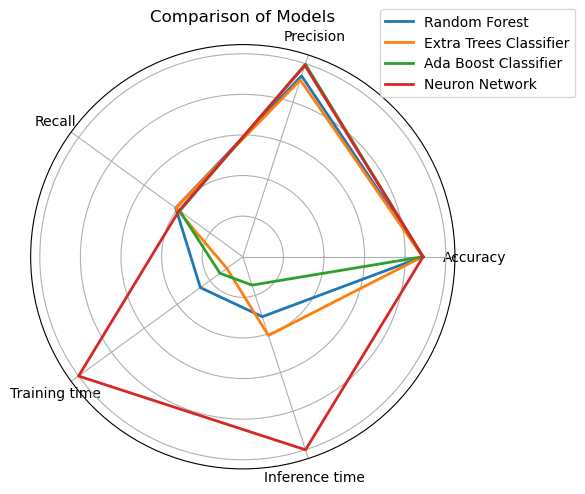

In [57]:
import mplcursors
# Lựa chọn các metric cần thiết
selected_metrics_df = model_evaluation.loc[['Accuracy', 'Precision', 'Recall', 'Training time', 'Inference time']]
# Chuẩn hóa dữ liệu
data_normalized = selected_metrics_df.copy()
data_normalized.loc['Training time':'Inference time'] = data_normalized.loc['Training time':'Inference time'].div(
    data_normalized.loc['Training time':'Inference time'].max(axis=1), axis=0
)
# Setup
angles = np.linspace(0, 2 * np.pi, len(data_normalized), endpoint=False).tolist()
angles += angles[:1]  

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, model in enumerate(selected_metrics_df.columns):
    values = data_normalized[model].tolist()
    values += values[:1] 
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(selected_metrics_df.index)

plt.title('Comparison of Models')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()

plt.savefig('.\Radar chart of models.png')
plt.show()

Từ bảng và biểu đồ radar trên có thể đưa ra nhận xét sau:
### 1. **Độ chính xác (Accuracy)**:
- **Neural Network** (0.8882) và **AdaBoost Classifier** (0.8880) có độ chính xác cao nhất, nhưng sự khác biệt giữa các mô hình là rất nhỏ.
- Tuy nhiên, Accuracy không phải là yếu tố quan trọng nhất trong bối cảnh này, vìcó nhiều khách hàng trả nợ đúng hạn hơn so với khách hàng quá hạn, và điều này có thể làm "lệch" độ chính xác.

### 2. **Độ chính xác dự đoán (Precision)**:
- **AdaBoost Classifier** (0.9976) và **Neural Network** (0.9906) có **Precision** cao nhất. Điều này có nghĩa là, trong số các khách hàng được dự đoán quá hạn, gần như tất cả đều thực sự quá hạn. Điều này rất quan trọng để giảm thiểu số lượng khách hàng trả nợ đúng hạn bị phân loại nhầm thành quá hạn.
- **Random Forest** (0.9368) và **Extra Trees** (0.9156) có nhiều dương tính giả hơn, tức là có nhiều khách hàng được dự đoán là quá hạn nhưng thực tế trả nợ đúng hạn.

### 3. **Độ nhạy (Recall)**:
- **Random Forest** và **Extra Trees** có cùng **Recall** (0.4086), tức là họ chỉ phát hiện được khoảng 40.86% các khách hàng thực sự quá hạn. Điều này có nghĩa là khoảng 59% khách hàng quá hạn (dương tính) không bị phát hiện (False Negatives).
- **AdaBoost** (0.3838) và **Neural Network** (0.3875) có **Recall** thấp hơn một chút, nghĩa là họ bỏ lỡ nhiều khách hàng quá hạn hơn so với **Random Forest** và **Extra Trees**.
- **Recall** thấp cho thấy tất cả các mô hình đều không hiệu quả trong việc phát hiện đủ số lượng khách hàng quá hạn, dẫn đến bỏ sót nhiều trường hợp cần chú ý.

### 4. **Thời gian huấn luyện (Training time)**:
- **Extra Trees Classifier** (4.13 giây) nhanh nhất trong huấn luyện, trong khi **Mạng nơ-ron** mất nhiều thời gian nhất (42.45 giây). 
### 5. **Thời gian suy diễn (Inference time)**:
- **AdaBoost Classifier** (0.11 giây) nhanh nhất trong việc dự đoán, phù hợp với các ứng dụng yêu cầu phản hồi nhanh chóng, chẳng hạn như đánh giá rủi ro tín dụng trong thời gian thực.
- **Neural Network** (0.76 giây) có thời gian suy diễn chậm nhất, có thể không phù hợp với các hệ thống yêu cầu dự đoán ngay lập tức.

### 6. **Nhận xét tổng quát**:
- **AdaBoost** và **Mạng nơ-ron** có **Precision** rất cao, giúp giảm thiểu rủi ro phân loại nhầm khách hàng trả nợ đúng hạn thành khách hàng quá hạn. Điều này rất hữu ích trong bối cảnh tín dụng, nơi quyết định nhầm lẫn có thể làm mất uy tín của khách hàng.
- **Random Forest** và **Extra Trees** có **Recall** cao hơn một chút, giúp phát hiện nhiều khách hàng quá hạn hơn. Tuy nhiên, điều này đi kèm với số lượng dương tính giả cao hơn (Precision thấp hơn).

Dựa trên nhận xét trên, nhóm đi đến quyết định chọn mô hình Ada Boost Classifier làm mô hình dự đoán. Lý do:
### 1. **Precision rất cao (0.9976)**:
- **Precision** cao nhất trong tất cả các mô hình, gần như 100%, giúp giảm thiểu rất tốt các **False Positives** (tức là các khách hàng trả nợ đúng hạn nhưng bị dự đoán là quá hạn).
- Điều này đặc biệt quan trọng trong bối cảnh tín dụng, nơi việc nhầm lẫn giữa khách hàng trả nợ đúng hạn và khách hàng quá hạn có thể gây ra mất lòng tin hoặc tổn hại đến uy tín của khách hàng.

### 2. **Thời gian suy diễn nhanh (0.1117 giây)**:
- **AdaBoost** có thời gian suy diễn ngắn nhất, chỉ 0.11 giây. Đối với một hệ thống xử lý dữ liệu lớn, tốc độ dự đoán này là rất quan trọng, đặc biệt khi hệ thống cần phản hồi nhanh chóng trong các quyết định về tín dụng, cho vay hoặc đánh giá rủi ro.
- Điều này cũng giúp tăng hiệu suất trong các môi trường yêu cầu thời gian thực hoặc gần thời gian thực (real-time processing).

### 3. **Độ chính xác tổng thể cao (0.8880)**:
- **Accuracy** của AdaBoost là rất cao (0.8880), cho thấy mô hình này hoạt động ổn định và chính xác trong việc dự đoán tổng thể. Mặc dù độ chính xác không phải là yếu tố quyết định nhất, nhưng đây vẫn là một thước đo quan trọng để đánh giá hiệu suất toàn diện của mô hình trên toàn bộ dataset.

### 4. **Cân bằng giữa Precision và Recall**:
- Mặc dù **Recall** của AdaBoost không cao nhất (0.3838), nhưng nó vẫn nằm ở mức chấp nhận được. Điều này có nghĩa là mô hình vẫn có thể phát hiện được một tỷ lệ khá lớn khách hàng quá hạn. Trong trường hợp này, Precision cao có thể được ưu tiên hơn, vì nhầm lẫn một khách hàng đúng hạn thành quá hạn thường nghiêm trọng hơn so với việc bỏ sót một số ít khách hàng quá hạn.
- **AdaBoost** phù hợp nếu đánh giá cao việc **tránh nhầm lẫn** các khách hàng trả nợ đúng hạn thành khách hàng quá hạn, hơn là phát hiện tất cả các khách hàng quá hạn.

### 5. **Thời gian huấn luyện hợp lý (5.8951 giây)**:
- **Thời gian huấn luyện** của AdaBoost tương đối ngắn (khoảng 5.9 giây), điều này rất có lợi khi cần cập nhật mô hình thường xuyên hoặc khi huấn luyện lại mô hình với dữ liệu mới. Đối với các hệ thống sử dụng dataset lớn, thời gian huấn luyện nhanh giúp đảm bảo tính khả thi của việc triển khai mô hình vào sản xuất.

### **Tóm lại**:
- **AdaBoost Classifier** là lựa chọn lý tưởng trong trường hợp này vì khả năng giảm thiểu rủi ro nhầm lẫn với khách hàng trả nợ đúng hạn (Precision rất cao), thời gian suy diễn nhanh, và độ chính xác tổng thể cao. Ngoài ra, mô hình này cũng dễ mở rộng và có thời gian huấn luyện hợp lý.

## Hiểu mô hình Ada Boost Classifier

In [60]:
feature_importances = pd.DataFrame({
    'features': selected_columns,
    'importance': model3.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

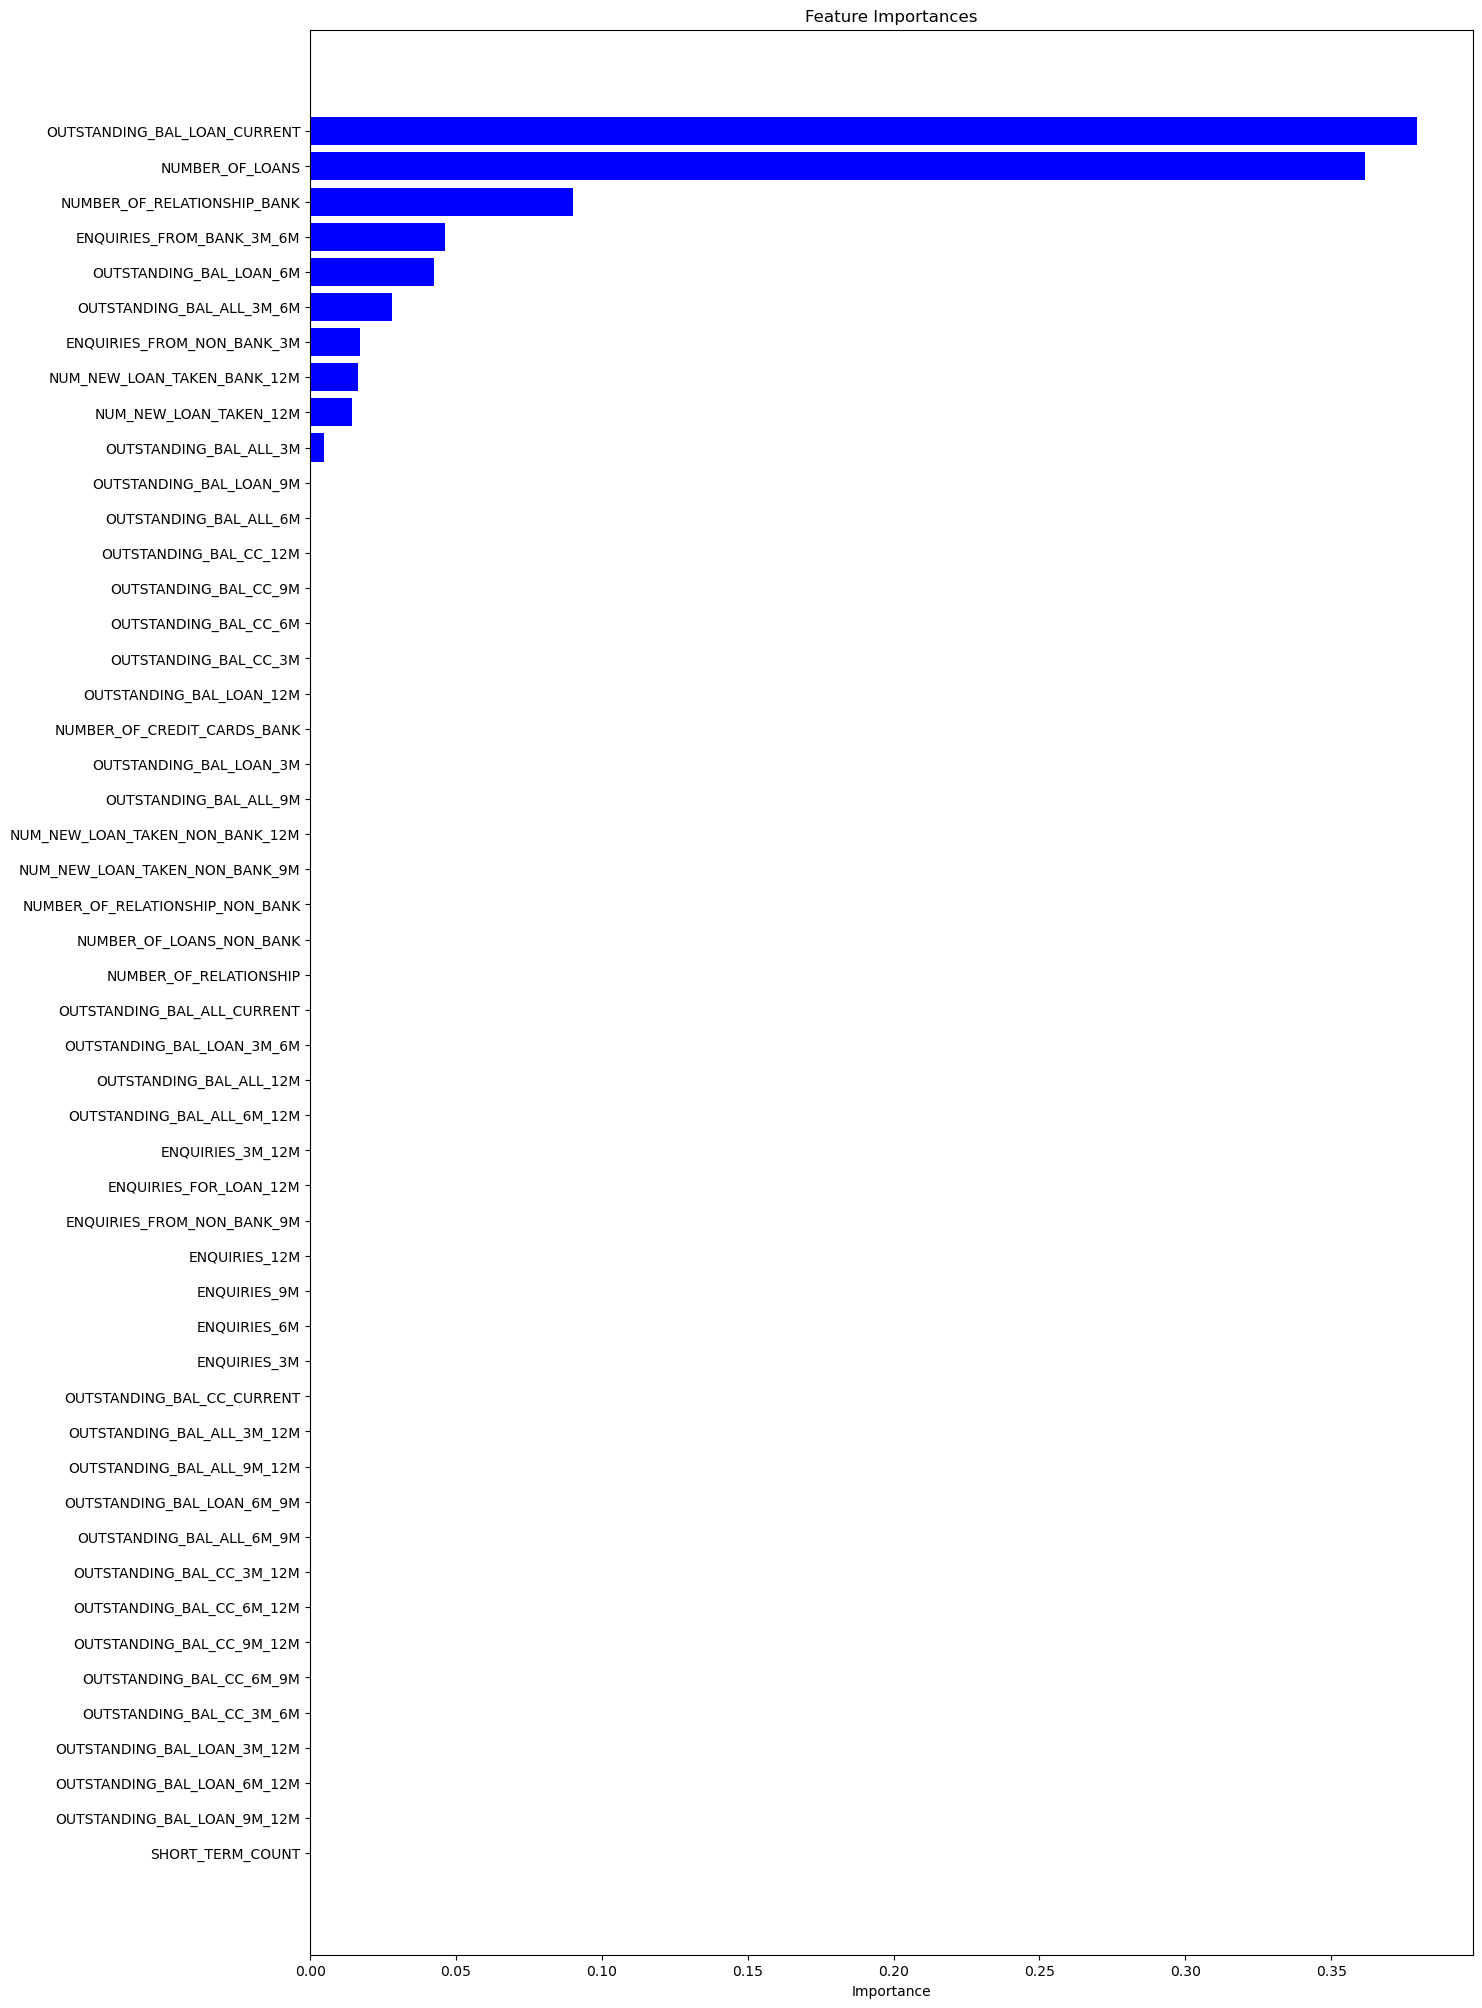

In [61]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.savefig('./Feature Importances.png')
plt.show()

In [74]:
feature_importances.sort_values(by ='importance',ascending = False)

,index,features,importance
49,11,OUTSTANDING_BAL_LOAN_CURRENT,0.3795
48,1,NUMBER_OF_LOANS,0.3615
47,5,NUMBER_OF_RELATIONSHIP_BANK,0.0900
46,48,ENQUIRIES_FROM_BANK_3M_6M,0.0461
45,13,OUTSTANDING_BAL_LOAN_6M,0.0425
44,34,OUTSTANDING_BAL_ALL_3M_6M,0.0279
43,44,ENQUIRIES_FROM_NON_BANK_3M,0.0170
42,8,NUM_NEW_LOAN_TAKEN_BANK_12M,0.0165
41,7,NUM_NEW_LOAN_TAKEN_12M,0.0143
40,20,OUTSTANDING_BAL_ALL_3M,0.0048


Dựa vào biểu đồ trên, có thể đưa ra nhận xét sau:
### 1. **Các đặc trưng quan trọng nhất**:
- **OUTSTANDING_BAL_LOAN_CURRENT (0.3795)** và **NUMBER_OF_LOANS (0.3615)** chiếm phần lớn trong tổng trọng số của các đặc trưng. Đây là hai đặc trưng quan trọng nhất, cho thấy rằng Số lượng các khoản vay và Tổng số dư nợ cho tất cả các sản phẩm tài chính tính đến hiện tại là những yếu tố chính ảnh hưởng đến khả năng phân loại khách hàng quá hạn hoặc trả nợ đúng hạn.
- **NUMBER_OF_RELATIONSHIP_BANK (0.0900)** cũng có mức độ quan trọng cao hơn so với các đặc trưng còn lại, nhưng vẫn thấp hơn nhiều so với hai đặc trưng đầu tiên.

### 2. **Đặc trưng có trọng số trung bình**:
- **ENQUIRIES_FROM_BANK_3M_6M (0.0461)** và **OUTSTANDING_BAL_LOAN_6M (0.0425)** có tầm quan trọng trung bình. Điều này cho thấy các số lượt tra cứu tín dụng liên quan đến các sản phẩm tài chính trong khoảng thời gian từ 3 đến 6 tháng, cũng như số dư các khoản vay trong 6 tháng, vẫn có một mức độ ảnh hưởng nhất định nhưng không lớn như các đặc trưng chính.

### 3. **Các đặc trưng ít quan trọng**:
- Các đặc trưng như **OUTSTANDING_BAL_ALL_3M_6M (0.0279)**, **ENQUIRIES_FROM_NON_BANK_3M (0.0170)** và **NUM_NEW_LOAN_TAKEN_BANK_12M (0.0165)** có tầm quan trọng thấp hơn. Điều này cho thấy rằng chúng không đóng vai trò lớn trong việc dự đoán.

### 4. **Đặc trưng không quan trọng (trọng số bằng 0)**:
- **Có rất nhiều đặc trưng với trọng số bằng 0**, chẳng hạn như **OUTSTANDING_BAL_LOAN_12M**, **OUTSTANDING_BAL_CC_3M_12M**, **NUMBER_OF_LOANS_NON_BANK**, **SHORT_TERM_COUNT**, và nhiều đặc trưng khác liên quan đến các số dư khoản vay hoặc số lượng quan hệ với ngân hàng và tổ chức phi ngân hàng.
- Việc các đặc trưng này có **trọng số bằng 0** cho thấy chúng không đóng góp gì vào việc dự đoán và có thể bị loại bỏ trong quá trình xây dựng mô hình mà không làm giảm hiệu suất.

### 5. **Nhận xét tổng quan**:
- Các đặc trưng chính liên quan đến **Tổng số dư nợ cho tất cả các sản phẩm tài chính tính đến hiện tại** và **số lượng khoản vay** là những yếu tố quyết định lớn nhất trong mô hình. Điều này có thể phản ánh rằng khả năng thanh toán hoặc quá hạn của khách hàng phụ thuộc chủ yếu vào khoản vay hiện tại của họ và tổng số khoản vay mà họ đã vay.
- Các đặc trưng không quan trọng (trọng số bằng 0) có thể được loại bỏ trong quá trình phân tích hoặc huấn luyện mô hình để giảm độ phức tạp và tối ưu hóa hiệu suất tính toán.

## Loại bỏ các features có trọng số bằng 0

In [67]:
column_to_remove = feature_importances[feature_importances['importance']==0]
column_to_remove

,index,features,importance
0,0,SHORT_TERM_COUNT,0.0000
1,26,OUTSTANDING_BAL_LOAN_9M_12M,0.0000
2,27,OUTSTANDING_BAL_LOAN_6M_12M,0.0000
3,28,OUTSTANDING_BAL_LOAN_3M_12M,0.0000
4,29,OUTSTANDING_BAL_CC_3M_6M,0.0000
5,30,OUTSTANDING_BAL_CC_6M_9M,0.0000
6,31,OUTSTANDING_BAL_CC_9M_12M,0.0000
7,32,OUTSTANDING_BAL_CC_6M_12M,0.0000
8,33,OUTSTANDING_BAL_CC_3M_12M,0.0000
9,35,OUTSTANDING_BAL_ALL_6M_9M,0.0000


In [73]:
remaining_columns = [col for col in selected_columns if col not in column_to_remove]
X_train_cleaned = pd.DataFrame(X_train_rfe, columns=selected_columns)[remaining_columns]
X_test_cleaned = pd.DataFrame(X_test_rfe, columns=selected_columns)[remaining_columns]
model3.fit(X_train_cleaned, y_train)
y_pred = model3.predict(X_test_cleaned)
tn_ab, fp_ab, fn_ab, tp_ab = metrics.confusion_matrix(y_test, y_pred).ravel()
accuracy_ab = metrics.accuracy_score(y_test, y_pred)
precision_ab = metrics.precision_score(y_test, y_pred)
recall_ab = metrics.recall_score(y_test, y_pred)

print(f"True positives: {tp_ab}")
print(f"False positives: {fp_ab}")
print(f"True negatives: {tn_ab}")
print(f"False negatives: {fn_ab}\n")

print(f"Accuracy: {accuracy_ab}")
print(f"Precision: {precision_ab}")
print(f"Recall: {recall_ab}")
print(f"Training time: {training_time_ab}")
print(f"Inference time: {inference_time_ab}")

True positives: 418
False positives: 1
True negatives: 4910
False negatives: 671

Accuracy: 0.888
Precision: 0.9976133651551312
Recall: 0.3838383838383838
Training time: 5.895078420639038
Inference time: 0.11171746253967285


So sánh output của mô hình sau khi loại bỏ số cột với mô hình cũ, nhóm thấy rằng các thông số đầu ra hoàn toàn giống hệt nhau. Như vậy có thể khẳng định hoàn toàn chắc chắn rằng loại bỏ những cột đó là đúng đắn

## Đề xuất giải pháp:

### 1. **Tập trung vào các đặc trưng quan trọng**

**a. Ý tưởng**: 
- Ngân hàng nên sử dụng các đặc trưng quan trọng như **Tổng số dư nợ hiện tại (OUTSTANDING_BAL_LOAN_CURRENT)** và **Số lượng khoản vay (NUMBER_OF_LOANS)** để đánh giá khả năng thanh toán của khách hàng.

- **Các yếu tố quan trọng**:
  - **OUTSTANDING_BAL_LOAN_CURRENT (0.3795)**: Cho biết tổng số dư nợ hiện tại mà khách hàng đang phải trả.
  - **NUMBER_OF_LOANS (0.3615)**: Số lượng khoản vay đang hoạt động, có thể ảnh hưởng đến áp lực tài chính của khách hàng.

- **Ý nghĩa**:
  - Nếu khách hàng có **dư nợ cao và nhiều khoản vay**, khả năng họ gặp khó khăn trong việc thanh toán nợ rất cao. 
  - Ngược lại, khách hàng với **dư nợ thấp và ít khoản vay** có khả năng trả nợ tốt hơn.

**b. Cách sử dụng**:
- **Phân loại khách hàng**: Dựa trên hai đặc trưng này, ngân hàng có thể phân loại khách hàng thành các nhóm rủi ro: **rủi ro cao**, **rủi ro trung bình**, và **rủi ro thấp**.
- **Ra quyết định cho vay**: Đối với nhóm rủi ro cao, ngân hàng nên áp dụng các chính sách thận trọng hơn như yêu cầu bảo lãnh hoặc giới hạn hạn mức vay. Nhóm rủi ro thấp có thể được cấp tín dụng dễ dàng hơn với lãi suất ưu đãi.

### 2. **Khai thác các đặc trưng có tầm quan trọng trung bình**

**a. Ý tưởng**: 
- Sử dụng các đặc trưng có tầm quan trọng trung bình như **Tra cứu tín dụng từ ngân hàng trong 3-6 tháng (ENQUIRIES_FROM_BANK_3M_6M)** và **Dư nợ trong 6 tháng (OUTSTANDING_BAL_LOAN_6M)** để bổ sung thông tin về khả năng thanh toán của khách hàng.
  - **ENQUIRIES_FROM_BANK_3M_6M (0.0461)**: Số lượt tra cứu tín dụng từ ngân hàng cho thấy mức độ quan tâm của ngân hàng đến khách hàng.
  - **OUTSTANDING_BAL_LOAN_6M (0.0425)**: Dư nợ trong 6 tháng gần đây có thể phản ánh khả năng tài chính hiện tại của khách hàng.

- **Ý nghĩa**:
  - Nếu khách hàng có nhiều lượt tra cứu và dư nợ ổn định, ngân hàng có thể xem xét rằng khách hàng đang trong quá trình cải thiện tài chính hoặc đang tìm kiếm giải pháp tài chính mới.

**b. Cách sử dụng**:
- **Ra quyết định cho vay**: Nếu khách hàng có số lượng tra cứu cao nhưng vẫn duy trì dư nợ thấp trong 6 tháng, ngân hàng có thể xem xét việc phê duyệt khoản vay với điều kiện hợp lý hơn, vì họ có thể đang trong quá trình cải thiện tình hình tài chính.

### 3. **Loại bỏ các đặc trưng không quan trọng**
- Ngân hàng nên xem xét loại bỏ các đặc trưng không quan trọng hoặc có trọng số bằng 0, như **OUTSTANDING_BAL_LOAN_12M** và **NUMBER_OF_LOANS_NON_BANK**, để giảm độ phức tạp trong mô hình.

- **Ý nghĩa**:
  - Việc loại bỏ các đặc trưng không đóng góp cho mô hình sẽ giúp ngân hàng giảm thiểu sai số trong dự đoán và tối ưu hóa quy trình phân loại khách hàng.

### Kết luận

- **Tập trung vào các đặc trưng quan trọng**, đặc biệt là số dư nợ và số lượng khoản vay, giúp ngân hàng đánh giá nhanh chóng tình hình tài chính của khách hàng.
- **Khai thác các đặc trưng có tầm quan trọng trung bình** để bổ sung thông tin và đưa ra quyết định cho vay hợp lý hơn.
- **Loại bỏ các đặc trưng không quan trọng** sẽ giúp đơn giản hóa mô hình và tối ưu hóa hiệu suất phân loại.

Những giải pháp này sẽ giúp ngân hàng nhanh chóng xác định được khách hàng tiềm năng và khách hàng có nguy cơ chậm trả nợ, từ đó đưa ra các biện pháp phòng ngừa hiệu quả.